# Netflix Titles Analysis

## Tarefa:
Esse projeto tem como objetivo explorar, descrever e obter informações gerais sobre títulos listados no catálogo da Netflix! entre os anos de 2008 e 2021.

## 1 - Preparação do Ambiente de Trabalho

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregamento dos dados brutos
data = pd.read_csv('data/netflix/netflix_titles.csv')

## 2 - Conhecendo os Dados

In [3]:
# Estrutura do DataFrame
data.shape

(8807, 12)

In [4]:
# Amostra do DataFrame inicial
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Informações sobre os dados iniciais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Observações
>Os tipos de dados de cada variável são atribuições feitas a partir da interpretação do Python, portanto devem ser analisadas criticamente pelo analista. Com isso em mente, pode-se afirmar que algumas alterações nos formatos das variáveis devem ser feitas. São elas:
>- **date_added**: Interpretada como *object*, será convertida para *datetime*;
>- **release_year**: Interpretada como *int*, será mantida dessa forma;
>- **release_year**: Interpretada como *object*, por hora, será mantida dessa forma;
>- Todas as demais variáveis serão convertidas para *string*.

In [6]:
# Descrevendo dados Qualitativos (de acordo com a interpretação do Python, antes das devidas transformações de formato)
data.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
# Valores ausentes
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Variável 'show_id'
Como essa variável representa a identificação de cada item, não podem haver valores duplicados.

In [8]:
# Checagem de valores duplicados
print('''Total de valores duplicados na variável 'show_id':''', data.show_id.duplicated().sum())

Total de valores duplicados na variável 'show_id': 0


Não foram encontrados valores duplicados na variável **show_id**.

### Variável 'type'

In [9]:
# Categorias nessa variável
print('''Total de itens por categoria da variável 'type':\n''')
print(data.type.value_counts())

Total de itens por categoria da variável 'type':

Movie      6131
TV Show    2676
Name: type, dtype: int64


Há somente duas categorias na variável **type**: 'Movie' e 'TV Show'.

### Variável 'country'

In [10]:
# Contagem por categoria
data.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Além dos 831 valores ausentes encontrados nessa variável, há valores contendo somente 1 país e há valores contendo mais de 1 país. Para que seja feita uma análise considerando os países individualmente, algum artifício específico deve ser usado.

### Variável 'date_added'

Verificando quais são os 10 valores ausentes da variável

In [11]:
# Verificação de quais são os valores ausentes
data[data.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


>Existem 10 valores ausentes na variável 'date_added'. A correta forma de tratar esses valores será abordada na etapa de **Tratamento de Valores Ausentes**.
- Após esse tratamento, o tipo de dado deverá ser convertido para o formato de data.

In [12]:
# Montando uma lista com os índices desses valores ausentes
data[data.date_added.isna()].index.tolist()

[6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182]

### Variável 'release_year'

In [13]:
# Valores únicos para a variável 'release_year'
data.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

Será necessária somente a conversão do tipo de dado. 

### Variável 'rating'

In [14]:
# Categorias da variável 'rating'
data.rating.value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

>Em três registros a variável **rating** parece ter sido preenchida com valores da variável **duration**. Essa questão será analisada a seguir.

In [15]:
# Repetindo a checagem de valores ausentes
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

>A variável **duration** possui 3 valores ausentes, sendo que esses valores podem ser aqueles que foram inseridos na variável **rating**. A seguir, será analisado se esse é o caso.

In [16]:
# Criação de uma lista com os registros que possuem valores nulos na variável 'duration'
regs = data[data['duration'].isna()].index.tolist()

In [17]:
# Exibindo somente os registros que possuem os valores nulos na variável 'duration'
data.loc[regs]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


>Os registros que possuem valores nulos na variável **duration** são os mesmos cujos valores na variável **rating** estão preenchidos como duração. Sendo assim, é provável que esses três valores em **rating** na verdade deveriam estar em **duration**. Dessa forma, na fase de **Tratamento de valores Ausentes** as devidas modificações serão feitas.

Ainda na exploração da variável **rating**, o significado de cada categoria foi extraído da página oficial da **Netflix** e é exibido abaixo:

- TV-Y: Designed to be appropriate for all children
- TV-Y7: Suitable for ages 7 and up
- G: Suitable for General Audiences
- TV-G: Suitable for General Audiences
- PG: Parental Guidance suggested
- TV-PG: Parental Guidance suggested
- PG-13: Parents strongly cautioned. May be inappropriate for ages under 13.
- TV-14: Parents strongly cautioned. May not be suitable for ages under 14.
- R: Restricted. May be inappropriate for ages under 17.
- TV-MA: For Mature Audiences
- NC-17: Inappropriate for ages 17 and under
- NR: Not Rated
- TV-Y7-FV: Suitable for ages 7 and up with Fantasy Violence
- UR: Unrated

A partir desse dicionário de dados, pode-se observar que os pares de categorias (G e TV-G), (PG e TV-PG) e (NR e UR) tem o mesmo significado. Com o objetivo de identificar se tipos diferentes de programas ('Movie' ou 'TV Show') recebem códigos diferentes de rating para o mesmo significado (por exemplo, 'Movie' com rating equivalente a 'Suitable for General Audiences' recebe somente 'G', ao passo que 'TV Show' recebe somente 'TV-PG'), será feita uma rápida exploração.

In [18]:
# Analisando os registros com 'rating' igual TV-G
regs_tv_g = (data[data['rating'] == 'TV-G']).index.tolist()
print(data.loc[regs_tv_g].type.value_counts())

Movie      126
TV Show     94
Name: type, dtype: int64


In [19]:
# Analisando os registros com 'rating' igual TV-PG
regs_tv_pg = (data[data['rating'] == 'TV-PG']).index.tolist()
print(data.loc[regs_tv_pg].type.value_counts())

Movie      540
TV Show    323
Name: type, dtype: int64


In [20]:
# Analisando os registros com 'rating' igual NR
regs_nr = (data[data['rating'] == 'NR']).index.tolist()
print(data.loc[regs_nr].type.value_counts())

Movie      75
TV Show     5
Name: type, dtype: int64


>Como observado, tanto a categoria 'Movie' quanto a categoria 'TV Show' podem receber qualquer uma das categorias de **rating**. Sendo assim, os pares (G e TV-G), (PG e TV-PG) e (NR e UR) podem ser condensados em uma só categoria por par. Isso será feito mais adiante.

### Variável 'duration'
Aparentemente, os itens cuja categoria da variável **type** e 'Movie', possuem 'duration' listada em minutos, ao passo que a categoria 'TV Show' da variável **type** possue 'duration' categorizada como número de temporadas (1 Season, 2 Seasons, etc.). Isso será verificado.

In [21]:
# Número de registros por número de temporadas na categoria 'TV Show'
data[data['type'] == 'TV Show'].duration.value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

>A categoria 'TV Show' da variável **type** possue somente dados categorizados como número de temporadas (Seasons) na variável **duration**. Agora, será feita uma exploração dos dados da categoria 'Movie' para analisar se todos esses registros estão com a duração em minutos, e não categorizados com o número de temporadas.

In [22]:
# Número de registros na categoria 'Movie'
list_duration = data[data['type'] == 'Movie'].duration.tolist()
print('Existem', len(list_duration), 'itens nessa lista.')

Existem 6131 itens nessa lista.


In [23]:
# Número de registros com duração em minutos na categoria 'Movie' da variável 'type'
cont = 0
i = 0
for item in list_duration:
    if ' min' in list_duration[i]:
        cont = cont + 1
    else:
        cont = cont
    i =+ 1
print('Existem', cont, 'itens na lista criada com duração em minutos.')

Existem 6131 itens na lista criada com duração em minutos.


In [24]:
# Diferença entre o número de registros com 'type' = 'Movie' e o número de registros com duração em minutos
dif = len(list_duration) - cont
print('Existem', dif, 'registros de diferença.')

Existem 0 registros de diferença.


Isso prova que todos os registros do tipo 'Movie' estão com a duração descrita em minutos, enquanto todos os registros do tipo 'TV Show' estão categorizados com o número de temporadas, desconsiderando os valores ausentes.

## 3 - Tratamento de Dados
### 3.1 - Drop de Colunas
As colunas **show_id**, **title**, **director**, **cast** e **description** não são de interesse dessa análise. Portanto, serão descartadas.

In [25]:
# Drop das colunas 'show_id', 'title', 'director', 'cast' e 'description'
data.drop(['show_id', 'title', 'director', 'cast', 'description'], axis=1, inplace = True)

In [26]:
# Amostra dos dados após o drop de colunas
data.head()

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### 3.2 - Tratamento de Valores Ausentes

#### 3.2.1 - Variável 'country'
Na variável **country**, há 831 valores ausentes que devem ser tratados.

In [27]:
# Valores ausentes na variável 'country'
data.country.value_counts(dropna = False)

United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [28]:
# Porcentagem de registros com valores ausentes
pct_country = (data.country.isna().sum()/data.shape[0])*100
print('''Porcentagem de registros com valores ausentes na variável 'country':''', '{:.2f}%'.format(pct_country))

Porcentagem de registros com valores ausentes na variável 'country': 9.44%


>Com quase 10% de registros com, valores ausentes, não é ideal a deleção de dados. A imputação por 'not_given' será a estratégia adotada.

In [29]:
# Imputação de valores ausentes na variável 'country' utilizadno 'not_given'
data.country.fillna('not_given', inplace = True)

In [30]:
# Checagem de valores ausentes na variável 'country' após a imputação
data.country.value_counts(dropna = False)

United States                             2818
India                                      972
not_given                                  831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

#### 3.2.2 Variáveis 'date_added', 'rating' e 'duration'
As variáveis **date_added**, **rating** e **duration** pussuem 10, 4 e 3 valores ausentes, respectivamente.

In [31]:
# Porcentagem de registros com valores ausentes em cada variável
pct_date_added = (data.date_added.isna().sum()/data.shape[0])*100
pct_rating = (data.rating.isna().sum()/data.shape[0])*100
pct_duration = (data.duration.isna().sum()/data.shape[0])*100

print('''\nPorcentagem de registros com valores ausentes na variável 'date_added':''', '{:.2f}%'.format(pct_date_added))
print('''\nPorcentagem de registros com valores ausentes na variável 'rating':''', '{:.2f}%'.format(pct_rating))
print('''\nPorcentagem de registros com valores ausentes na variável 'duration':''', '{:.2f}%'.format(pct_duration))


Porcentagem de registros com valores ausentes na variável 'date_added': 0.11%

Porcentagem de registros com valores ausentes na variável 'rating': 0.05%

Porcentagem de registros com valores ausentes na variável 'duration': 0.03%


>Como a porcentagem de registros com valores ausentes nessas variáveis em relação a todo o dataset é muito pequena, a deleção desses registros é uma estratégia plausível, e será adotada.

>Vale ressaltar que anteriormente foi identificado que alguns valores da variável **duration** haviam sido inseridos incorretamente na variável **rating**. Normalmente, após essa identificação, o correto seria transferir esses dados para a coluna correta. Entretanto, mesmo com a transferência desses dados, os seus registros seriam deletados seguindo o critério acima indicado. Portanto, não faz sentido realizar essas substituições em registros que logo em seguida serão deletados.

In [32]:
# Deleção dos registros com valores ausentes nas variáveis 'date_added', 'rating' e 'duration'
data.dropna(subset = ['date_added', 'rating', 'duration'], inplace = True)

In [33]:
# Conferindo o número de valores ausentes ao final do processo
data.isna().sum()

type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

>Não foram encontrados valores ausentes após seu tratamento.

In [34]:
# Conferindo a estrutura dos dados
data.shape

(8790, 7)

>Originalmente haviam 8807 registros. Após o tratamento de valores ausentes, existem 8790 registros, ou 17 registros a menos. Trata-se de uma diferença de 0,19% no número de regsitros, o que não será prejudicial à análise.

In [35]:
# Número de registros por variável
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   country       8790 non-null   object
 2   date_added    8790 non-null   object
 3   release_year  8790 non-null   int64 
 4   rating        8790 non-null   object
 5   duration      8790 non-null   object
 6   listed_in     8790 non-null   object
dtypes: int64(1), object(6)
memory usage: 549.4+ KB


>Confirmando o que já foi mostrado anteriormente, todas as variáveis possuem 100% dos valores preenchidos. Entretanto, vale ressaltar que ao longo do processo de análise podem ser encontrados novos valores que não representam informação útil ao dataset (como os símbolos "?", "@", "#" ocupando lugar de data ou países por exemplo). Esses valores também são valores ausentes, portanto a etapa de tratamento de valores ausentes pode ter novos capítulos ao longo da análise.

In [36]:
# Amostra dos dados
data.head()

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,not_given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,not_given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### 3.3 - Agrupamento de categorias de mesmo significado

#### 3.3.1 - Variável 'rating'
Para a variável **rating**, os registros dos pares de categoria 'G' e 'TV-G', 'PG' e 'TV-PG', 'NR' e 'UR', tem o mesmo significado. Sendo assim, serão agrupados de forma que a todos os registros da categoria 'G' será imputada a categoria 'TV-G', a todos os registros da categoria 'PG' será imputada a categoria 'TV-PG' e a todos os registros da categoria 'UR' será imputada a categoria 'NR'.

In [37]:
# Número de registros por categoria da variável 'rating'
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [38]:
# Imputação dos valores:
# G recebe TV-G
# PG recebe TV-PG
# UR recebe NR

data['rating'] = np.where(data['rating'] == 'G', 'TV-G', data['rating'])
data['rating'] = np.where(data['rating'] == 'PG', 'TV-PG', data['rating'])
data['rating'] = np.where(data['rating'] == 'UR', 'NR', data['rating'])

In [39]:
# Número de registros por categoria da variável 'rating' após a imputação
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG       1148
R            799
PG-13        490
TV-Y7        333
TV-Y         306
TV-G         261
NR            82
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

### 3.4 - Conversão dos tipos de dados

#### 3.4.1 Variáveis 'date_added'

In [40]:
# Conversão da coluna 'date_added' de object para datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [41]:
# Amostra dos dados
data.head()

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [42]:
# Informações sobre o dataset após a conversão do formato da variável 'date_added'
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   country       8790 non-null   object        
 2   date_added    8790 non-null   datetime64[ns]
 3   release_year  8790 non-null   int64         
 4   rating        8790 non-null   object        
 5   duration      8790 non-null   object        
 6   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 549.4+ KB


#### 3.4.2 Variáveis 'type', 'listed_in', 'country' e 'rating'

In [43]:
# Conversão das colunas 'type', 'country', 'rating' e 'listed_in' para o formato string
cols = data.columns.drop(['date_added', 'release_year', 'duration']).tolist()

for col in cols:
    data[col] = data[col].astype("string")

In [44]:
# Dados após a conversão
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   string        
 1   country       8790 non-null   string        
 2   date_added    8790 non-null   datetime64[ns]
 3   release_year  8790 non-null   int64         
 4   rating        8790 non-null   string        
 5   duration      8790 non-null   object        
 6   listed_in     8790 non-null   string        
dtypes: datetime64[ns](1), int64(1), object(1), string(4)
memory usage: 549.4+ KB


In [45]:
# Amostra de dados após a conversão
data.head(10)

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,not_given,2021-09-24,2021,TV-PG,91 min,Children & Family Movies
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"


#### 3.4.3 Variável 'durarion'

Para essa conversão, serão criados 2 subsets: um contendo somente títulos do tipo 'Movies' e outro com o tipo 'Tv Show'.

In [46]:
# Subsets por 'type'
dm = data.loc[data['type'] == 'Movie']
dtv = data.loc[data['type'] == 'TV Show']

In [47]:
# Conversão da variável 'duration' para 'int' para títulos do tipo 'Movie'
dm = dm.applymap(lambda valor : valor.replace(" min", "") if isinstance (valor, str) else valor)
dm['duration'] = dm['duration'].astype('int')

In [48]:
# Conversão da variável 'duration' para 'int' para títulos do tipo 'TV Show', com criação de uma nova coluna
dtv['seasons'] = dtv['duration'].str.extract('(\d+)').astype('int')

In [49]:
# Amostra dos dados após a conversão
dm.head()

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021-09-25,2020,PG-13,90,Documentaries
6,Movie,not_given,2021-09-24,2021,TV-PG,91,Children & Family Movies
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
9,Movie,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
12,Movie,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies"


In [50]:
# Tipos dos dados
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6126 non-null   object        
 1   country       6126 non-null   object        
 2   date_added    6126 non-null   datetime64[ns]
 3   release_year  6126 non-null   int64         
 4   rating        6126 non-null   object        
 5   duration      6126 non-null   int32         
 6   listed_in     6126 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 358.9+ KB


> Algumas variáveis tiveram seus tipos indevidamente alterados. Então será feita a correção a seguir

In [51]:
# Conversão do tipo de dado das variáveis 'type', 'country', 'rating' e 'listed_in'
cols = ['type', 'country', 'rating', 'listed_in']

for col in cols:
    dm[col] = dm[col].astype('string')

In [52]:
# Tipos dos dados pós conversão
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6126 non-null   string        
 1   country       6126 non-null   string        
 2   date_added    6126 non-null   datetime64[ns]
 3   release_year  6126 non-null   int64         
 4   rating        6126 non-null   string        
 5   duration      6126 non-null   int32         
 6   listed_in     6126 non-null   string        
dtypes: datetime64[ns](1), int32(1), int64(1), string(4)
memory usage: 358.9 KB


## 4 - Visualizações

### 4.1 - Relação entre títulos do tipo 'TV Show' e 'Movie'

In [53]:
# Adicionando ao DataFrame original uma nova coluna contendo o ano que um título foi adicionado ao catálogo
data['year_added'] = pd.DatetimeIndex(data['date_added']).year

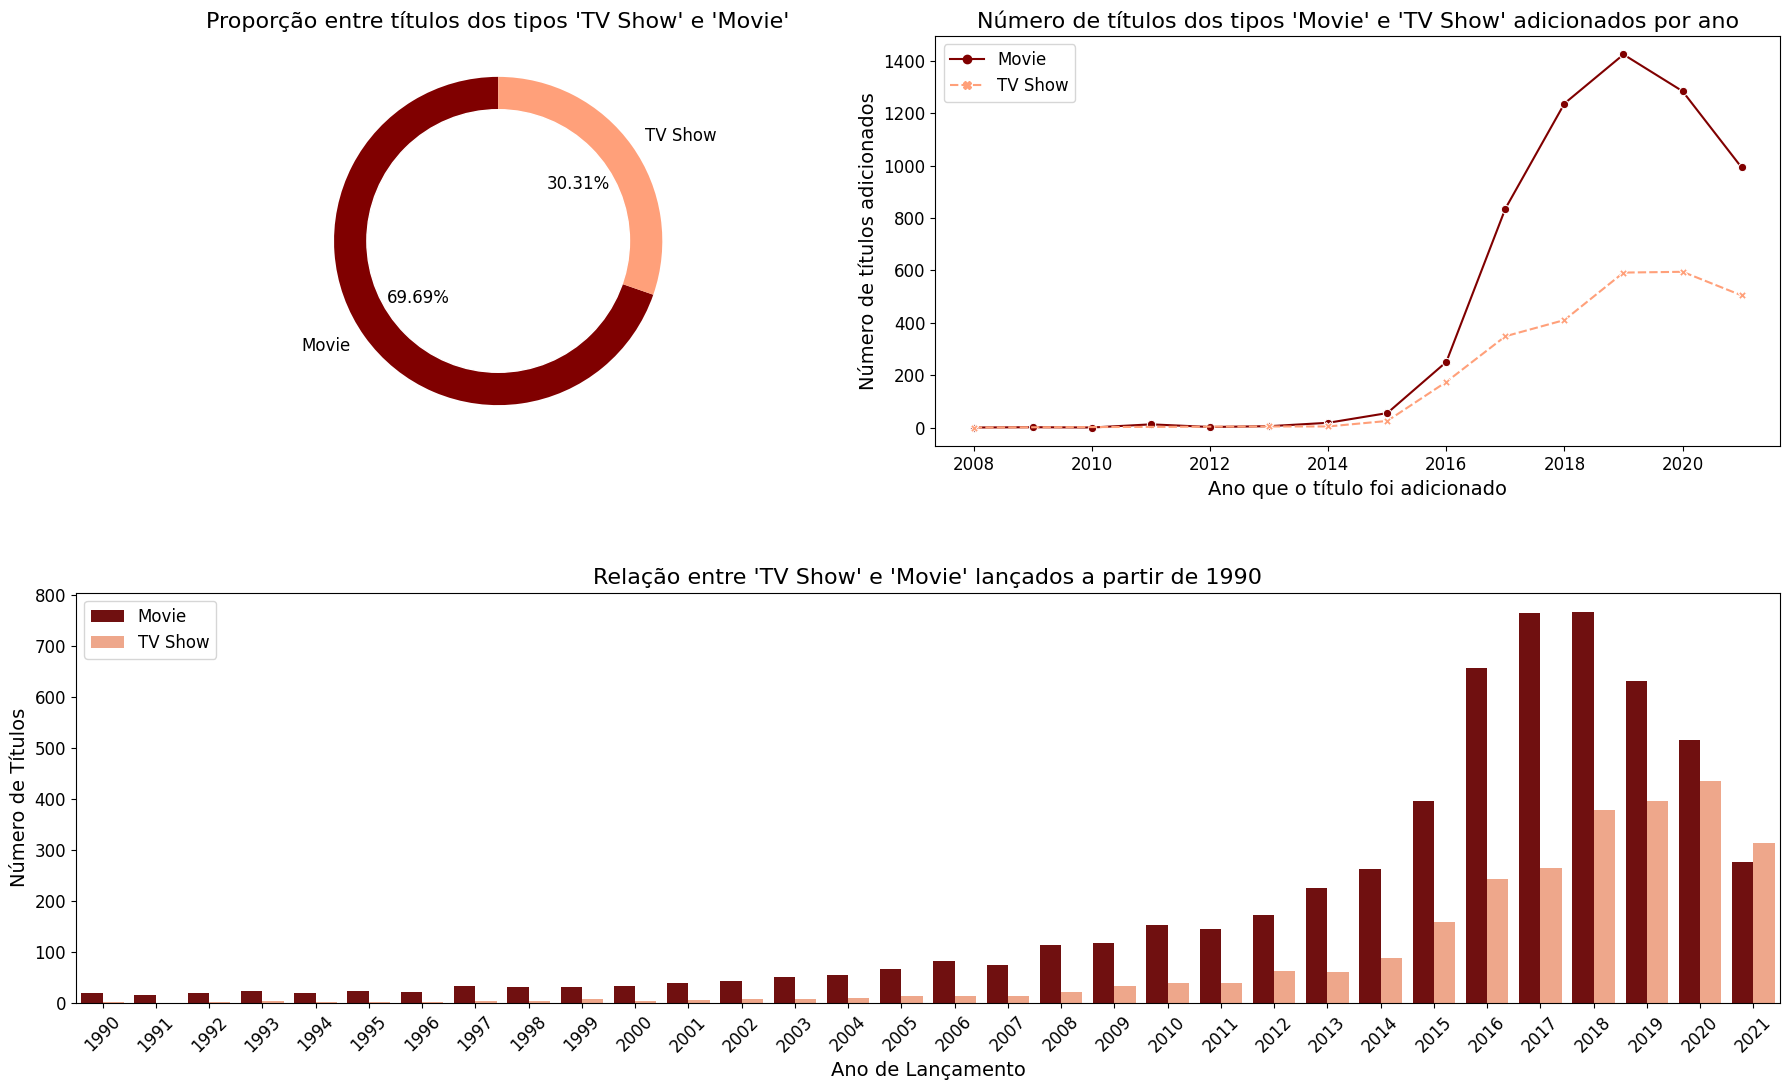

In [54]:
#PLotagens

plt.figure(figsize=(18,11))


# Dados Gráfico 1
typ = data.type.value_counts().reset_index(name='count')

# Gráfico 1
plt.subplot(2,2,1)
plt.pie(typ['count'], labels = typ['index'], autopct='%.2f%%', colors=['maroon', 'lightsalmon'], startangle=90, 
        textprops={'fontsize': 12})
plt.title("Proporção entre títulos dos tipos 'TV Show' e 'Movie'", fontsize=16)
p = plt.gcf()
ax1 = p.gca().add_artist(plt.Circle( (0,0), 0.8, color='white'))


# Dados Gráfico 2
years = data[['type', 'year_added']].groupby(['type', 'year_added']).size().reset_index(name='count')

# Gráfico 2
plt.subplot(2,2,2)
sns.lineplot(data=years, x='year_added', y='count', hue='type', style='type', markers = True, palette=['maroon', 'lightsalmon'])
plt.title("Número de títulos dos tipos 'Movie' e 'TV Show' adicionados por ano", fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Ano que o título foi adicionado', fontsize = 14)
plt.ylabel('Número de títulos adicionados', fontsize = 14)
plt.legend(loc = 2, fontsize = 12)


# Dados Gráfico 3
type_year = data.query('release_year >= 1990')
type_year = type_year[['type', 'release_year']].groupby(['type', 'release_year']).size().reset_index(name='count')

# Gráfico 3
plt.subplot(2,1,2)
sns.barplot(data=type_year, x='release_year', y='count', hue='type', palette=['maroon', 'lightsalmon'])
plt.title("Relação entre 'TV Show' e 'Movie' lançados a partir de 1990", fontsize=16)
plt.xticks(fontsize = 12, rotation=45)
plt.yticks(fontsize = 12)
plt.xlabel('Ano de Lançamento', fontsize = 14)
plt.ylabel('Número de Títulos', fontsize = 14)
plt.legend(loc = 2, fontsize = 12)


# Ajustes e exibição
plt.tight_layout(h_pad = 5)

plt.show()

#### -> Interpretações
- A partir dos gráficos exibidos acima, nota-se que quase 70% dos títulos no catálogo da Netflix são filmes.
- Entre os anos de 2008 e 2014 filmes e séries de TV foram adicionados seguindo aproximadamente a mesma proporção. A partir de 2015 hove aumento expressivo na listagem de filmes, alcançando o pico em 2019. A listagem de séries de TV segue a mesma direção, entretando com proporções bem moderadas.
- Observa-se portanto um maior interesse da plataforma Netflix em listar filmes do que séries de TV. Isso pode ser causado por diversos fatores, como diferença na disponibilidade de filmes e séries de TV no mercado, diferença entre o custo de produção dos dois tipos de entreterimento, maior interesse do público por um tipo do que pelo outro, entre outros. Esse estudo não é suficiente para inferir algo a respeito, portanto é necessário um estudo mais aprofundado para se chegar a conclusões mais confiáveis.
- A queda em listagem de títulos lançados nos anos de 2020 e 2021 pode inclusive ter relação com a pandemia do coronavírus, que pode ter influenciado nas produções de novos títulos. Mas não é possível, a partir dessa análise, afirmar que essa é a causa.
- Exclusivamente em 2021, há mais séries de TV do que filmes lançados. Isso pode ser explicado por uma limitação do dataset, que não possui cadastro de títulos adicionados a partir de outubro de 2021. Ou seja, há a possibilidade de novos títulos terem sido adicionados após esse perído e não estarem cadastrados no dataset usado.

### 4.2 - Número de títulos de acordo com a classificação etária ('rating')

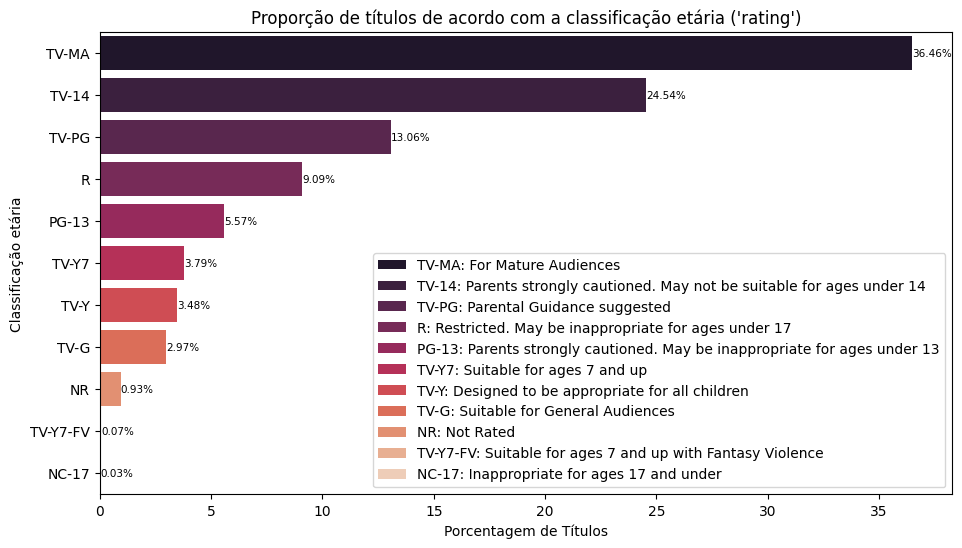

In [55]:
# Dados para plotagem
rating = data.rating.value_counts().reset_index(name = 'count')
rtng = rating.assign(pct=rating['count']/(rating['count'].sum())*100)

# Plotagem
plt.figure(figsize=(11,6))

ax = sns.barplot(rtng, x=rtng['pct'], y=rtng['index'], palette = 'rocket', orient = 'h', 
            label = ['TV-MA: For Mature Audiences',
                     'TV-14: Parents strongly cautioned. May not be suitable for ages under 14',
                     'TV-PG: Parental Guidance suggested',
                     'R: Restricted. May be inappropriate for ages under 17',
                     'PG-13: Parents strongly cautioned. May be inappropriate for ages under 13',
                     'TV-Y7: Suitable for ages 7 and up',
                     'TV-Y: Designed to be appropriate for all children',
                     'TV-G: Suitable for General Audiences',
                     'NR: Not Rated',
                     'TV-Y7-FV: Suitable for ages 7 and up with Fantasy Violence',
                     'NC-17: Inappropriate for ages 17 and under'])

plt.title("Proporção de títulos de acordo com a classificação etária ('rating')")
plt.ylabel('Classificação etária')
plt.xlabel('Porcentagem de Títulos')
plt.bar_label(ax.containers[0], fmt = '%.2f%%', size = 7.5)
plt.legend()

plt.show()

#### -> Interpretações
- A partir de uma análise do gráfico do item **4.2**, pode-se concluir que a maior parte dos títulos listados na Netflix não são apropriados para todas as idades. Menos de 3% dos títulos são de classificação indicativa livre, além de 3.48% voltados propriamente para o público infantil. Para crianças a partir de 7 anos de idade há um maior número de títulos apropriados.
- Apesar de haver uma considerável representação de títulos para crianças em geral, o maior foco da plataforma está em conteúdos voltados para o público jovem e adulto.

### 4.3 - Número de títulos listados de acordo com o ano de lançamento e páis de produção
#### 4.3.1 - Preparação dos dados

In [56]:
# Amostra dos dados
data.head(10)

,type,country,date_added,release_year,rating,duration,listed_in,year_added
0,Movie,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021
5,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
6,Movie,not_given,2021-09-24,2021,TV-PG,91 min,Children & Family Movies,2021
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021
8,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021
9,Movie,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021


In [57]:
# Criando uma coluna com a década de lançamento do título para futuro agrupamento
data['release_decade'] = data['release_year'].apply(lambda valor : valor//10*10)
dm['release_decade'] = dm['release_year'].apply(lambda valor : valor//10*10)
dtv['release_decade'] = dtv['release_year'].apply(lambda valor : valor//10*10)

In [58]:
# Amostra dos dados após criação da coluna 'decade'
data.head(10)

,type,country,date_added,release_year,rating,duration,listed_in,year_added,release_decade
0,Movie,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2020
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,2020
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,2020
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,2020
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,2020
5,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,2020
6,Movie,not_given,2021-09-24,2021,TV-PG,91 min,Children & Family Movies,2021,2020
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,1990
8,TV Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,2020
9,Movie,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,2020


#### 4.3.2 Utiizando subsets separados por 'type' já criados

In [59]:
# Subsets por 'type'
data_movie = dm
data_tvshow = dtv

In [60]:
# Comprimento do subset de 'Movie'
data_movie.shape[0]

6126

In [61]:
# Comprimento do subset de 'TV Show'
data_tvshow.shape[0]

2664

In [62]:
# Contagem dos valores de 'Movie' e 'TV Show' em 'data' para conferir se está de acordo com os comprimentos dos subsets criados
data.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: Int64

> Separação concluída com êxito.

In [63]:
# Amostra de dados de data_movie
data_movie.head()

,type,country,date_added,release_year,rating,duration,listed_in,release_decade
0,Movie,United States,2021-09-25,2020,PG-13,90,Documentaries,2020
6,Movie,not_given,2021-09-24,2021,TV-PG,91,Children & Family Movies,2020
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",1990
9,Movie,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",2020
12,Movie,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",2020


In [64]:
# Amostra de dados de data_tvshow
data_tvshow.head()

,type,country,date_added,release_year,rating,duration,listed_in,seasons,release_decade
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2,2020
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,2020
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",1,2020
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2,2020
5,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,2020


#### 4.3.3 - Criando DataFrames com o número de títulos lançados por país e por década

Como pontuado anteriormente, na variável **country** há registros com 1 só país e com mais de 1 país. Portanto, é necessário fazer a separação desses países quando aparecem juntos em uma mesma célula. Esse procedimento pode ser conferido a seguir, onde será criado um novo dataframe contendo o país, o ano e o número de títulos para aquele país naquele ano. Isso será feito separadamente para títulos do tipo 'Movie' e do tipo 'TV Show', criando assim dois dataframes: **count_movies** e **count_tvshow**.

In [65]:
# Movies por país e por ano
movies_per_country_year = data_movie
movies_per_country_year = movies_per_country_year.assign(country=movies_per_country_year['country'].str.split(',')).explode('country')
movies_per_country_year = movies_per_country_year.applymap(lambda valor : valor.strip() if isinstance(valor, str) else valor)
count_movies = movies_per_country_year.groupby(['country', 'release_decade']).size().reset_index(name='count')

count_movies.head(10)

,country,release_decade,count
0,,1970,1
1,,2010,4
2,,2020,1
3,Afghanistan,2010,1
4,Albania,2010,1
5,Algeria,1970,1
6,Algeria,2010,1
7,Algeria,2020,1
8,Angola,2020,1
9,Argentina,1980,2


In [66]:
# Removendo os registros com valores sem preenchimento em 'country'
count_movies['country'] = np.where(count_movies['country'] == '', np.nan, count_movies['country'])
count_movies['country'] = np.where(count_movies['country'] == 'not_given', np.nan, count_movies['country'])
count_movies.dropna(inplace = True)

# Reoordenando os dados de forma decrescente de acordo com a coluna de contagem 'count'
count_movies=count_movies.sort_values(by=['count'], ascending = False).reset_index().drop(columns=['index'])

In [67]:
# Amostra dos dados
count_movies.head(10)

,country,release_decade,count
0,United States,2010,1840
1,India,2010,628
2,United Kingdom,2010,375
3,United States,2000,373
4,United States,2020,265
5,Canada,2010,254
6,France,2010,231
7,India,2000,163
8,United States,1990,152
9,Spain,2010,138


In [68]:
# Shape dos dados
count_movies.shape

(280, 3)

In [69]:
# TV Show por país e por ano
tvshow_per_country_year = data_tvshow
tvshow_per_country_year = tvshow_per_country_year.assign(country=tvshow_per_country_year['country'].str.split(',')).explode('country')
tvshow_per_country_year = tvshow_per_country_year.applymap(lambda valor : valor.strip() if isinstance(valor, str) else valor)
count_tvshow = tvshow_per_country_year.groupby(['country', 'release_decade']).size().reset_index(name='count')

count_tvshow.head(10)

,country,release_decade,count
0,,2020,1
1,Argentina,2000,1
2,Argentina,2010,12
3,Argentina,2020,7
4,Australia,1980,1
5,Australia,1990,1
6,Australia,2000,2
7,Australia,2010,45
8,Australia,2020,15
9,Austria,2020,1


In [70]:
# Removendo os registros com valores sem preenchimento ou com 'not_given' em 'country'
count_tvshow['country'] = np.where(count_tvshow['country'] == '', np.nan, count_tvshow['country'])
count_tvshow['country'] = np.where(count_tvshow['country'] == 'not_given', np.nan, count_tvshow['country'])
count_tvshow.dropna(inplace = True)

# Reoordenando os dados de forma decrescente de acordo com a coluna de contagem 'count'
count_tvshow=count_tvshow.sort_values(by=['count'], ascending = False).reset_index().drop(columns=['index'])

In [71]:
# Amostra dos dados
count_tvshow.head(10)

,country,release_decade,count
0,United States,2010,559
1,United States,2020,292
2,United Kingdom,2010,194
3,Japan,2010,135
4,South Korea,2010,127
5,Canada,2010,91
6,France,2010,62
7,United Kingdom,2020,57
8,India,2010,56
9,Taiwan,2010,51


In [72]:
# Shape dos dados
count_tvshow.shape

(146, 3)

#### 4.3.4 - Visualizações

#### Movie

In [73]:
# Criando uma lista com as décadas de interesse para Movie
movies_decades = count_movies['release_decade'].unique().tolist()
movies_decades.sort()
movies_decades

[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [74]:
count_movies.head()

,country,release_decade,count
0,United States,2010,1840
1,India,2010,628
2,United Kingdom,2010,375
3,United States,2000,373
4,United States,2020,265


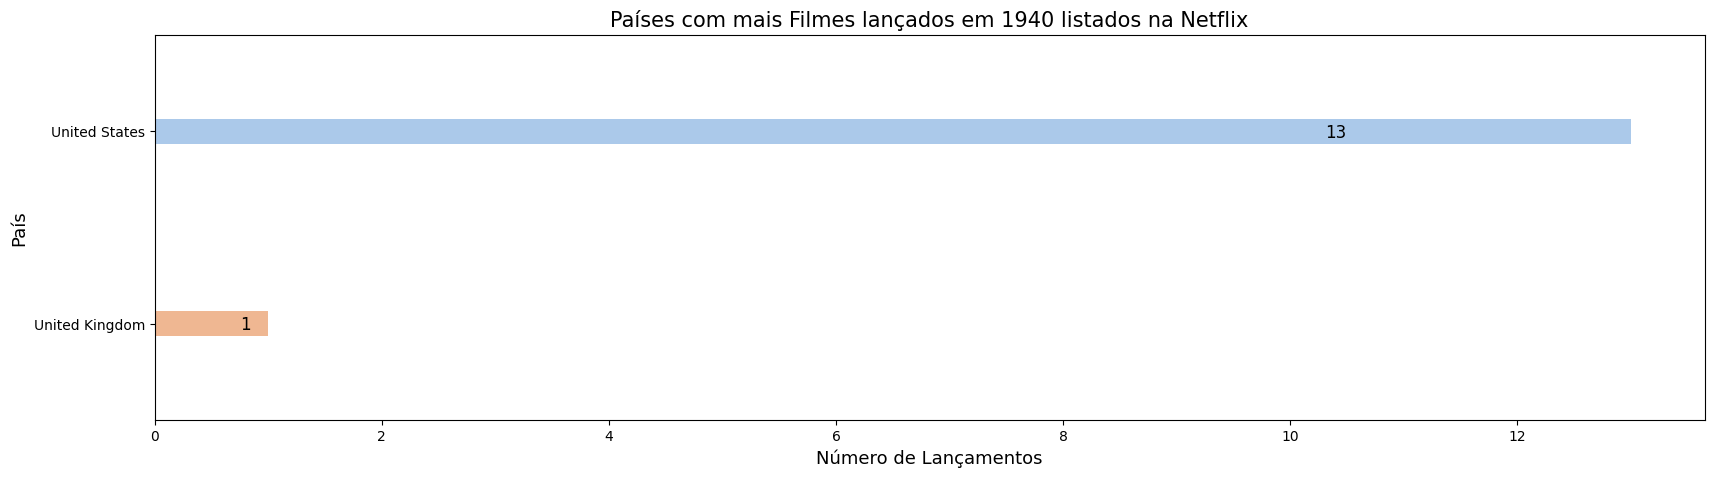

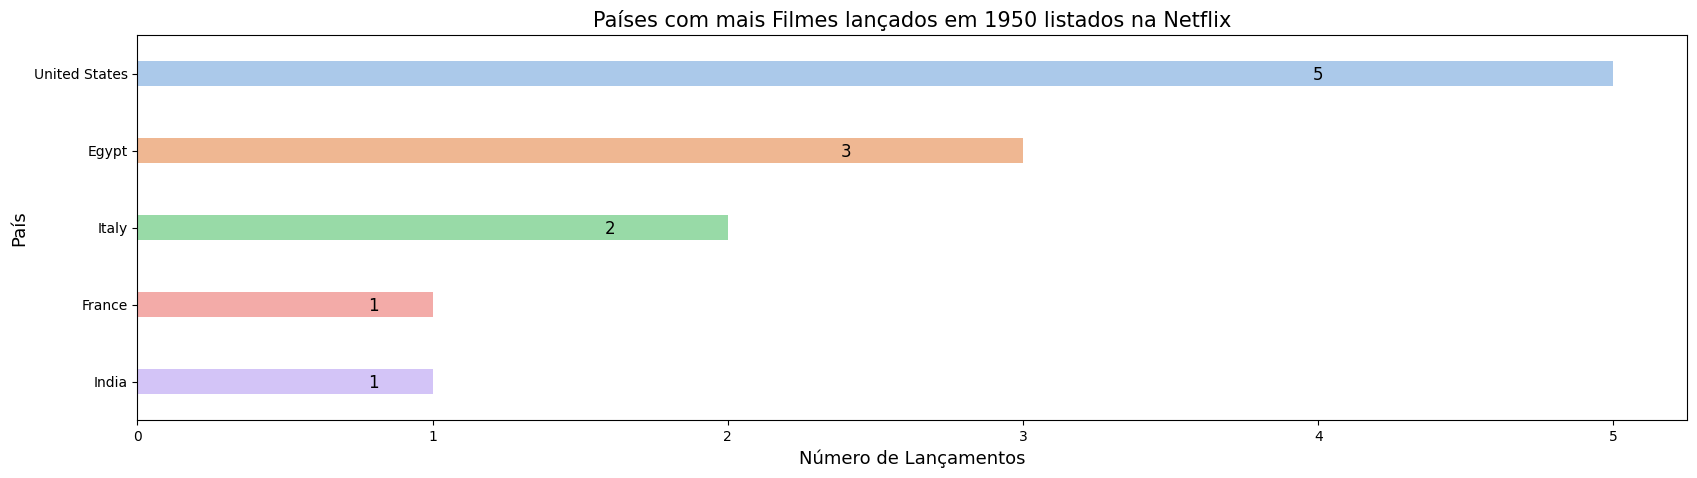

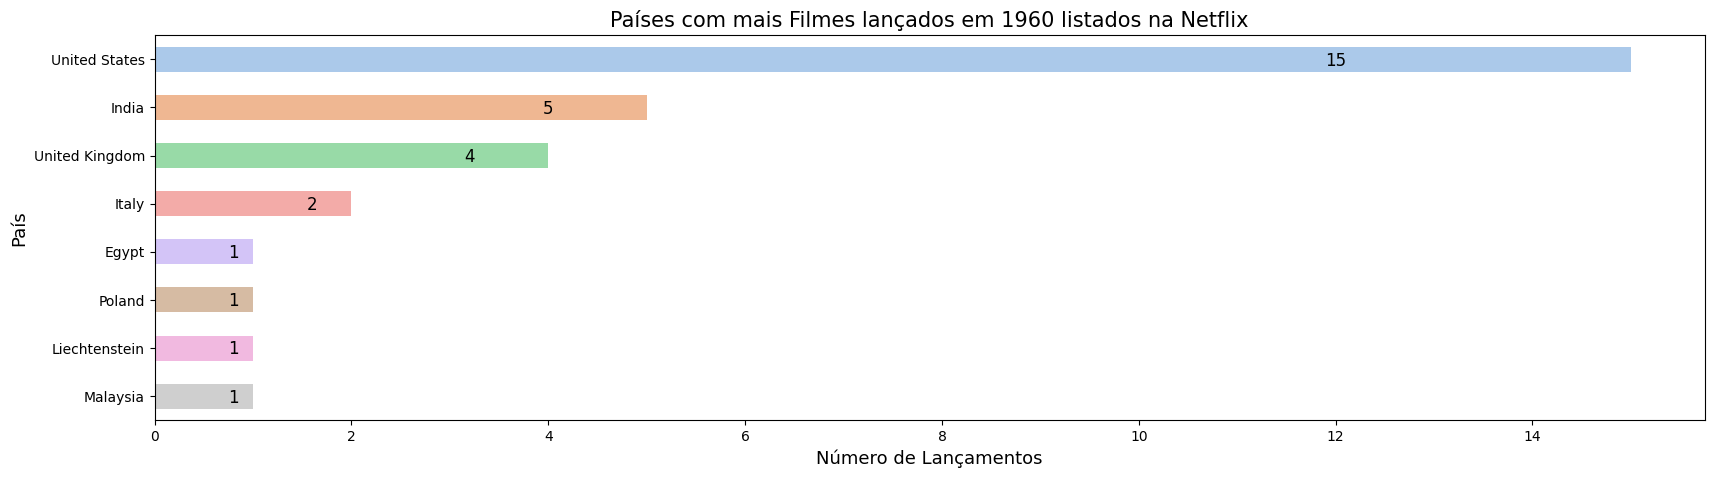

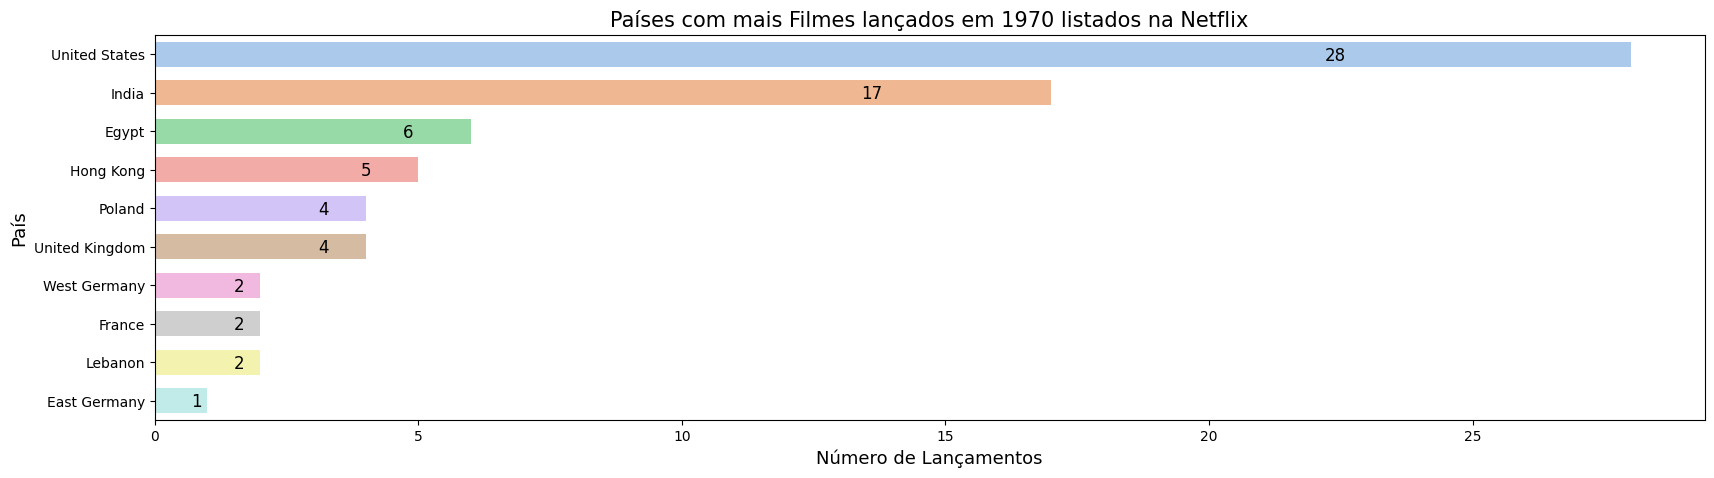

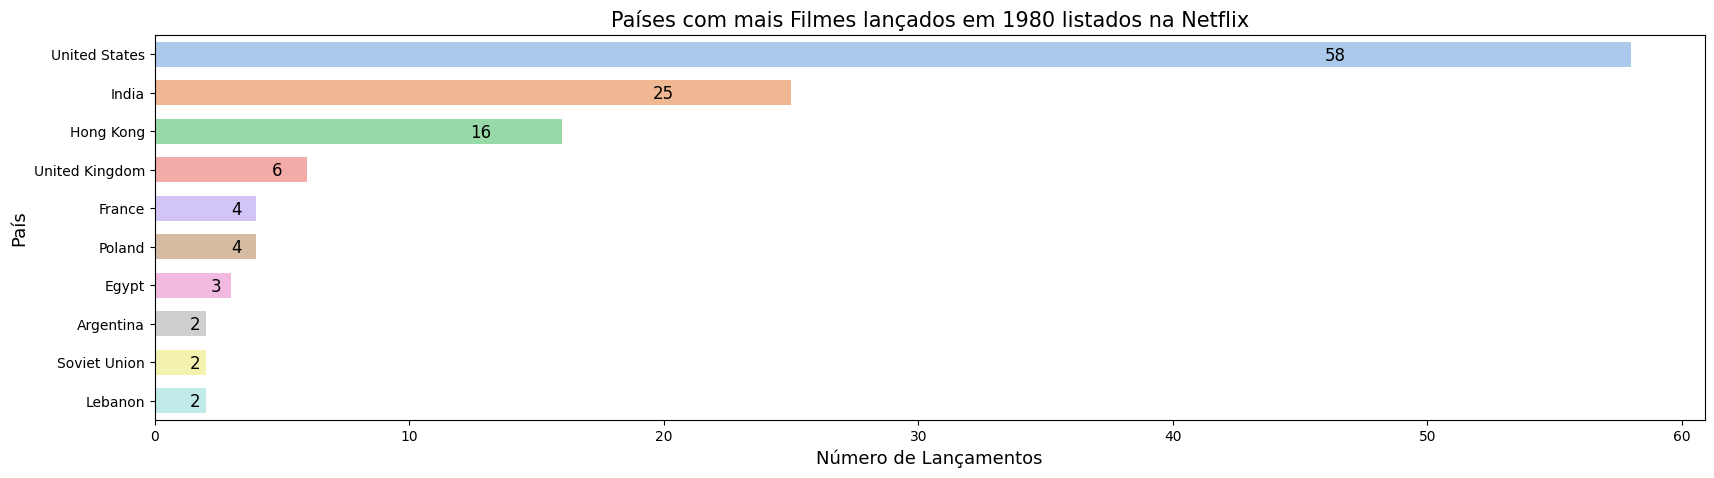

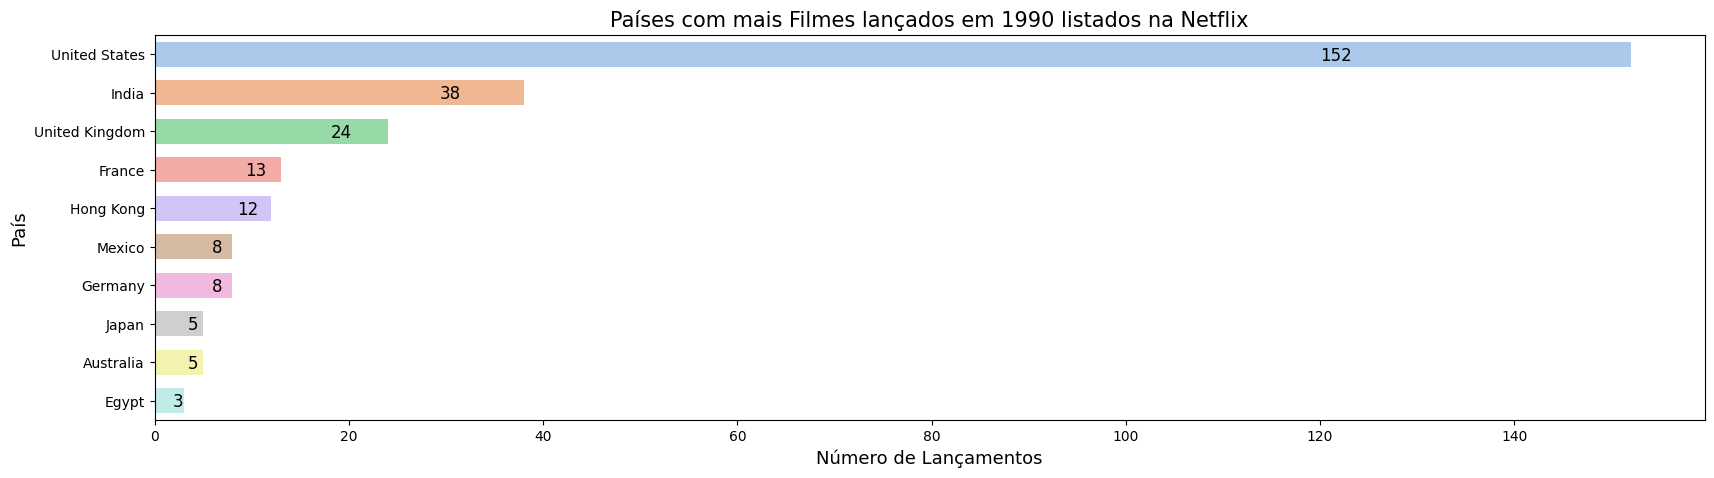

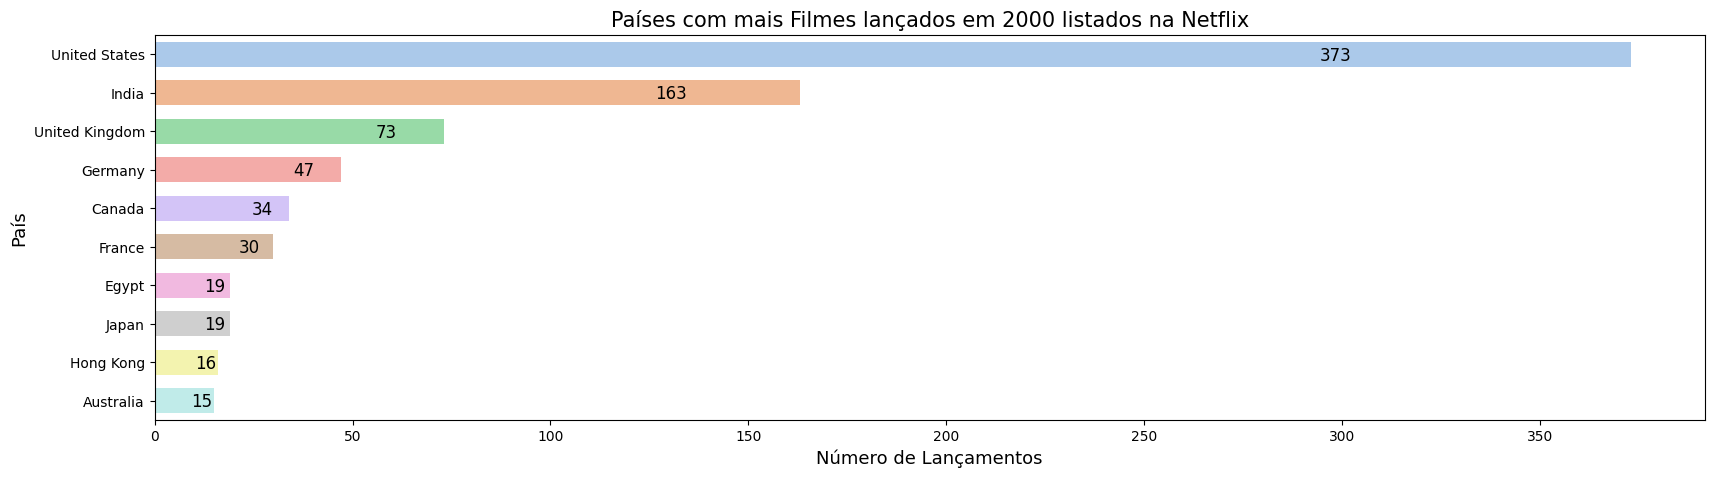

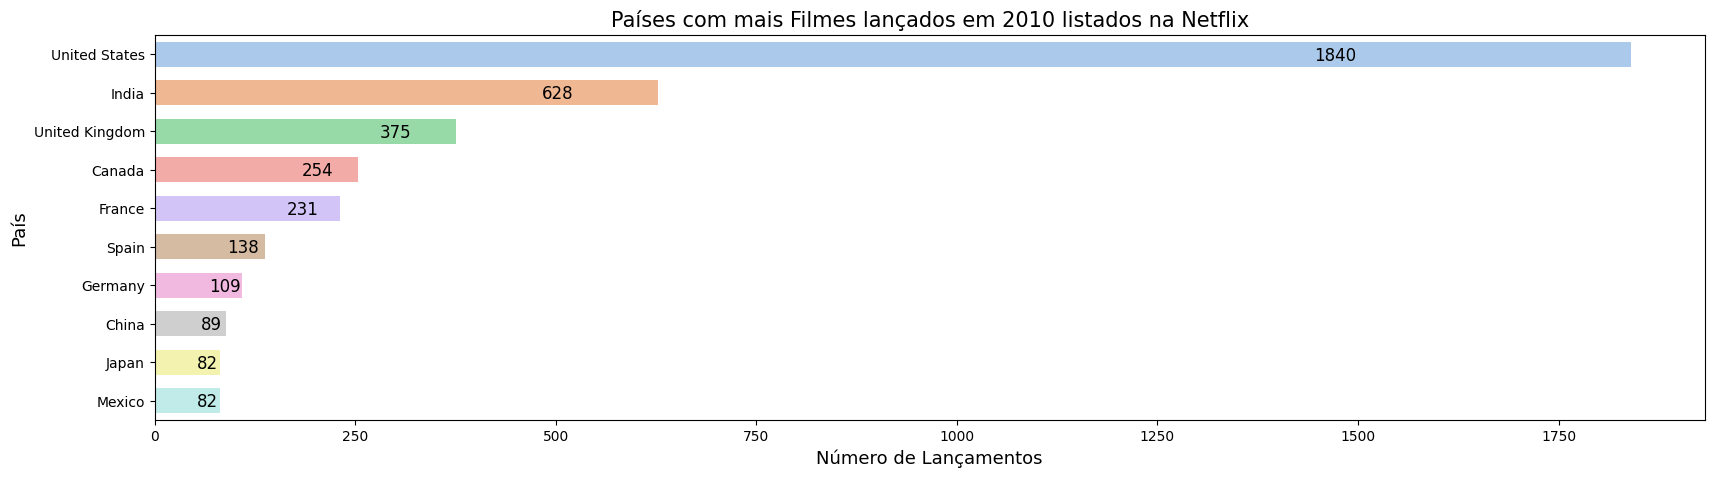

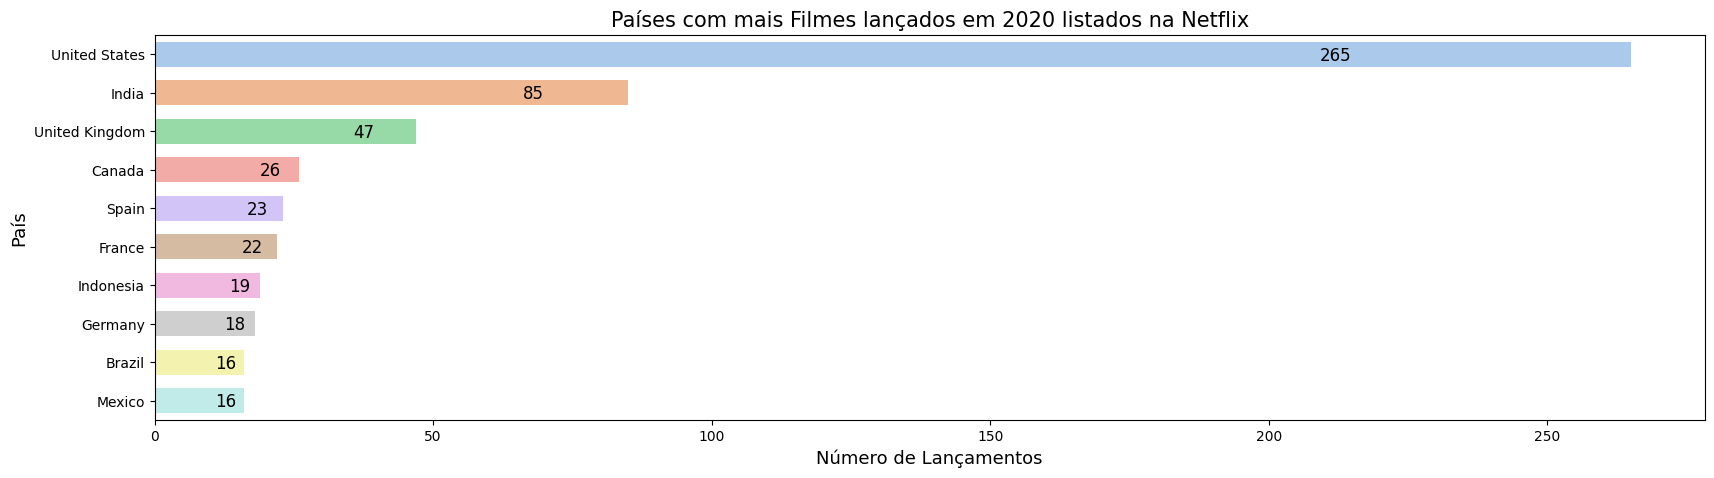

In [75]:
# Plotagem
for decade in movies_decades:

    df_movies = count_movies.loc[count_movies['release_decade'] == decade].head(10)
    width_m = df_movies.country.count()

    ax = plt.figure(figsize =(20,5))
    ax = sns.barplot(df_movies, x=df_movies['count'], y=df_movies['country'], width = 0.065*width_m, palette = 'pastel')
    plt.title('''Países com mais Filmes lançados em %d listados na Netflix''' % (decade), fontsize = 15)
    plt.xlabel('Número de Lançamentos', fontsize = 13)
    plt.ylabel('País', fontsize = 13)
    for p in ax.patches:
        width = p.get_width()
        plt.text(0.8*p.get_width(), p.get_y()+0.55*p.get_height(),
                 '{:1.0f}'.format(width),
                 ha='center', va='center', fontsize = 12)
    plt.show()

> Para as décadas de 1940, 1950 e 1960, há poucos países (menos de 10 em cada período) cujos filmes relacionados foram adicionados ao catálogo da Netflix. Isso pode estar relacionado por exemplo ao menor número de títulos produzidos naquela época, ou até mesmo à falta de interesse da plataforma em adicionar títulos muito antigos.

#### -> Interpretações
- Para todas as décadas utilizadas nesses estudo os Estados Unidos permaneceram em primeiro no número de filmes listados no catálogo da Netflix. Isso já era esperado, dada a magnitude do setor cinematográfico estadunidense. O próprio fato de a Netflix ser dos Estados Unidos pode ser visto como outra justificativa para haver tantos filmes norte-americanos em seu catálogo.
- A Índia aparece de forma muito expressiva desde a década de 1960, mantendo a segunda colocação por todas as décadas seguintes. De fato, a industria cinematográfica indiana possui grande relevância principalmente no cenário asiático, sendo muito presente ao redor de todo o mundo.
- A participação do Reuno Unido nesse ranking tornou-se mais expresseiva a partir dos anos 1990, mantendo-o na terceira colocação.
- Países como Alemanha, Canadá, França e Espanha possuem uma quantidade de filmes listados bem menor que os 3 primeiros países, mas ainda assim com relevante participação nessa contagem, alternando de posição no ranking de acordo com a década de estudo.
- Um caso interessante é o do Egito: ao passo que quase todos os demais países aumentaram o número de filmes listados na Netflix ao longo dos anos, o Egito manteve a média de listagem baixa. Devido a isso, sua segunda colocação no ranking na década de 1950 foi perdida nas décadas posteriores.
- Para quase todo o período de estudo nota-se que filmes de produção estadunidense e indiana são mais presentes no catálogo da netflix se comparados a produções de outras nações.

#### TV Show

In [76]:
# Criando uma lista com as décadas de interesse para TV Show
tvshow_decades = count_tvshow['release_decade'].unique().tolist()
tvshow_decades.sort()
tvshow_decades

[1940, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

As décadas de 1940 e 1960 só possuem títulos listados na Netflix para o tipo 'TV Show' para os Estados Unidos. Então, para manter o caráter comparativo entre diferentes países, serão usadas as décadas a partir de 1970.

In [77]:
tvshow_decades = [1970, 1980, 1990, 2000, 2010, 2020]

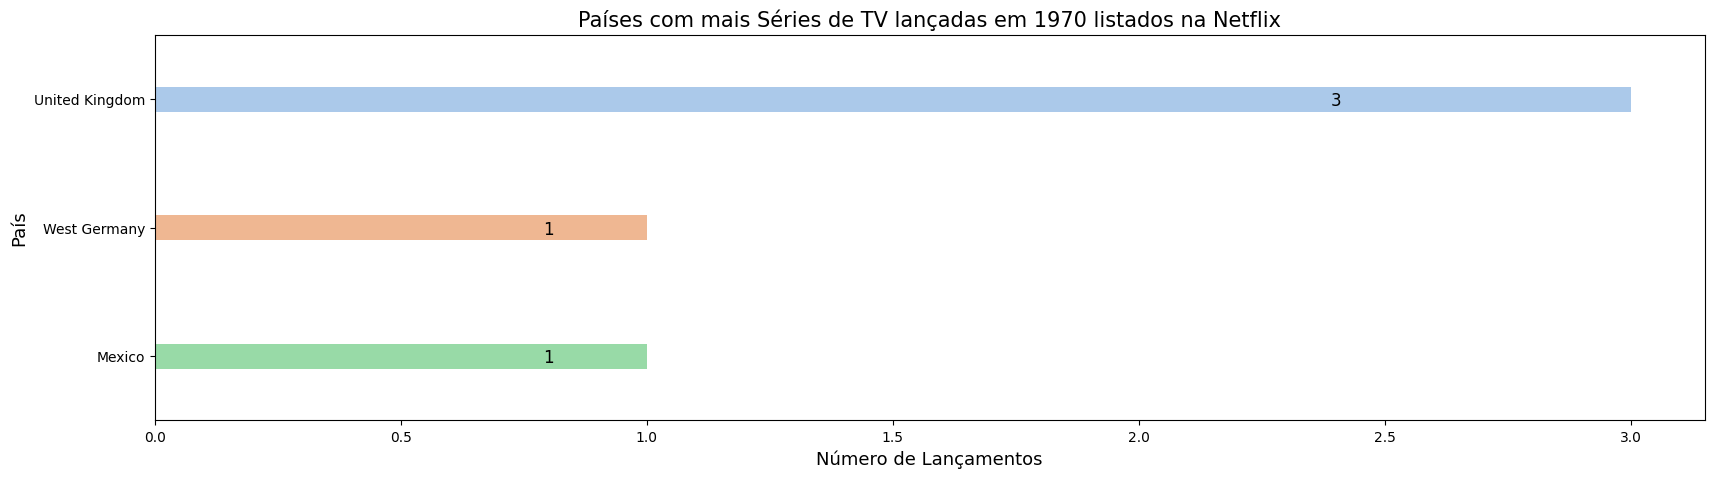

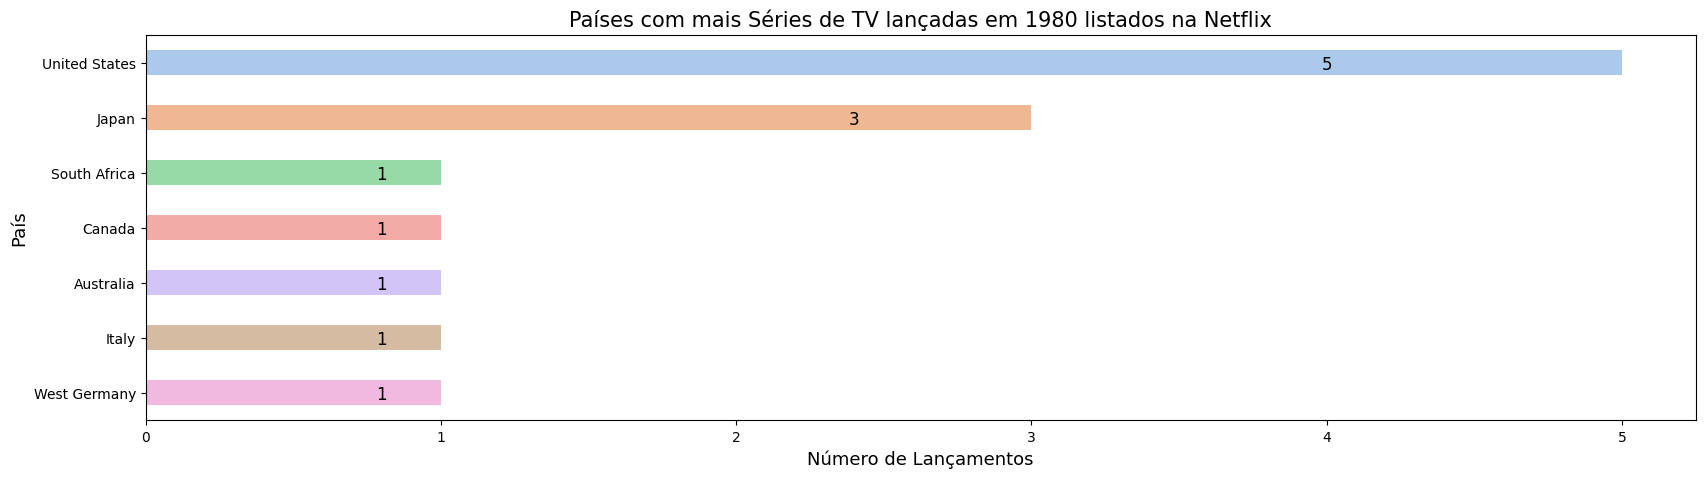

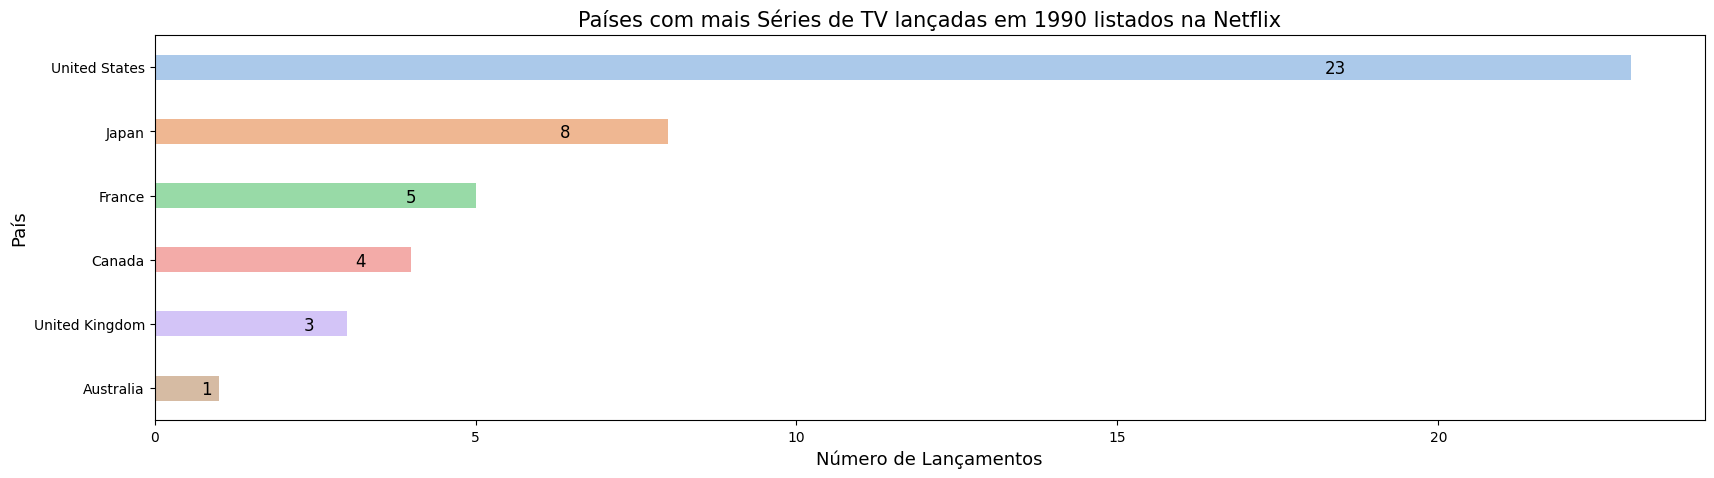

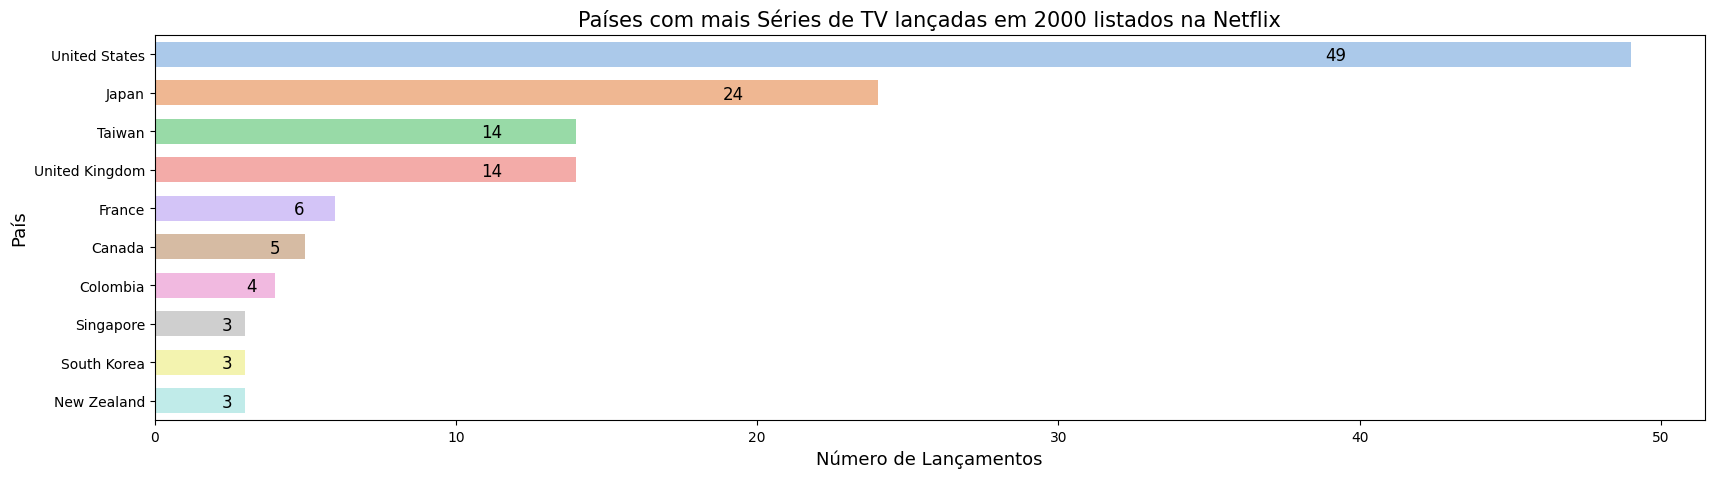

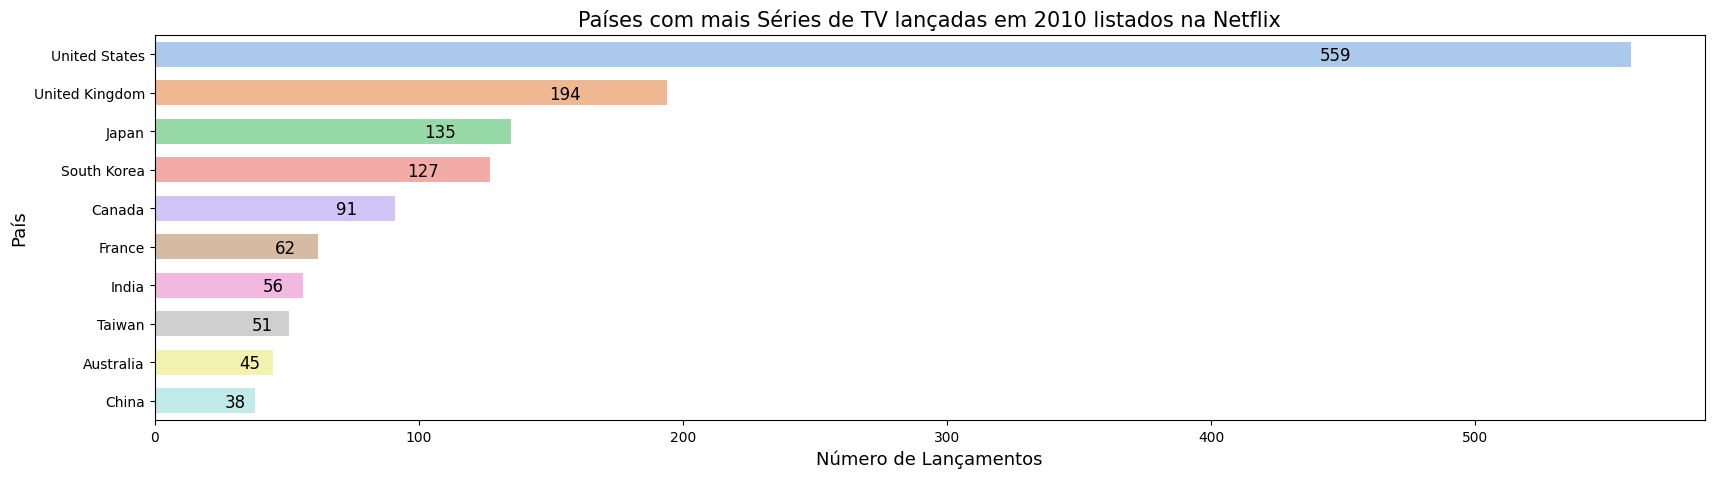

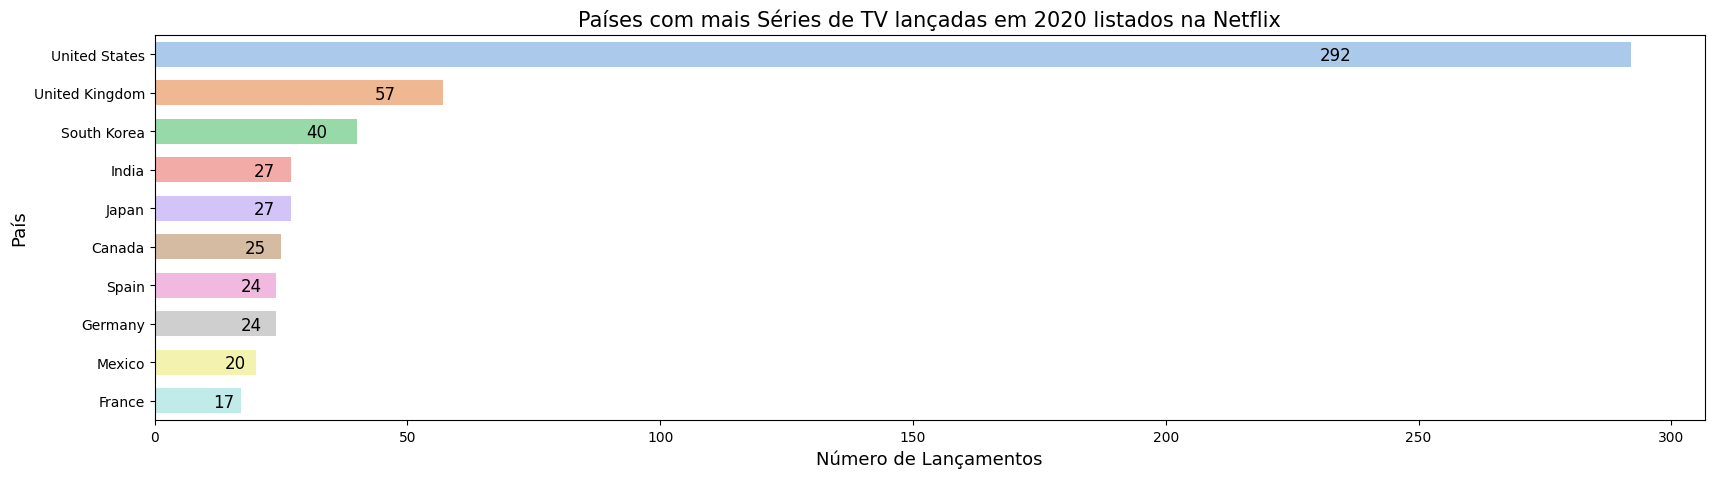

In [78]:
# Plotagem
for decade in tvshow_decades:

    df_tvshow = count_tvshow.loc[count_tvshow['release_decade'] == decade].head(10)
    width_tv = df_tvshow.country.count()

    ax = plt.figure(figsize =(20,5))
    ax = sns.barplot(df_tvshow, x=df_tvshow['count'], y=df_tvshow['country'], width = 0.065*width_tv, palette = 'pastel')
    plt.title('''Países com mais Séries de TV lançadas em %d listados na Netflix''' % (decade), fontsize = 15)
    plt.xlabel('Número de Lançamentos', fontsize = 13)
    plt.ylabel('País', fontsize = 13)
    for p in ax.patches:
        width = p.get_width()
        plt.text(0.8*p.get_width(), p.get_y()+0.55*p.get_height(),
                 '{:1.0f}'.format(width),
                 ha='center', va='center', fontsize = 12)
    plt.show()

> Como dito anteriormente, para as décadas de 1940 e 1960, somente títulos dos EUA estão listados na Netflix, por isso esse período foi desconsiderado por não permitir comparações. Para a década de 1950 não há nenhum título. Para as décadas a partir de 1990, houve um expressivo aumento no número de títulos listados na Netflix, o que faz muito sentido visto que produtos do tipo série de TV (ou TV Show, como no dataset de estudo) se popularizaram muito a partir dos anos 1990.

#### -> Interpretações
- Para a década de 1970, o Reino Unido aparece com mais títulos listados. 
- Estados Unidos possuem o maior número de títulos listados na plataforma Netflix a partir da década de 1980.
- O Japão mostra grande participação a partir de 1990, mas com certa queda nos anos 2020. Uma observação para esse fato é que para a década de 2020 só existem dados para os anos de 2020 e 2021, portanto não se pode tirar informações precipitadas sobre esse período. Um estudo anual seria necessário para comparar com outros períodos.
- Taiwan surge nos anos 2000 com uma alta contagem de títulos, mas não acompanha o aumento na listagem de títulos de outros países e cai nas décadas seguintes.
- A partir dos anos 2010, Índia e Coréia do Sul começam a ter muitos títulos listados.
- O Canadá aparece no ranking em todos os períodos desde 1980, com contagem modesta de títulos listados.
- Séries de TV de língua inglesa se mostram muito mais presentes no catálogo da netflix do que qualquer outro idioma. Isso pode ser explicado pelo fato de a própria netflix ser estadunidense, ou até mesmo pela popularidade do iioma inglês em nível global, ou ambas questões somadas.


### 4.4 - Número de títulos de acordo com  sua categoria ('Listed_in')

#### 4.5.1 - Preparação dos dados 
#### Número de Séries de TV por categoria de 'listed_in'

In [79]:
# Criação de um DataFrame contendo somente séries de TV e sua contagem de acordo com a categoria da variável 'listed_in'
tvshows = dtv.loc[data['type'] == 'TV Show']
tvshows_listed = tvshows
tvshows_listed = tvshows_listed.assign(listed_in=tvshows_listed['listed_in'].str.split(',')).explode('listed_in')
tvshows_listed = tvshows_listed.applymap(lambda valor : valor.strip() if isinstance(valor, str) else valor)
tvshows_grouped = tvshows_listed.groupby('listed_in').size().reset_index(name='count').sort_values(by = 'count', ascending = False)
tvshows_grouped

,listed_in,count
5,International TV Shows,1349
15,TV Dramas,762
14,TV Comedies,573
3,Crime TV Shows,469
6,Kids' TV,448
4,Docuseries,394
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,252
0,Anime Series,174


In [80]:
# Criação de uma lista com os valores únicos da variável 'listed_in' para séries de TV
unique_tvshows = tvshows_grouped.listed_in.unique().tolist()

#### Número de Filmes por categoria de 'listed_in'

In [81]:
# Criação de um DataFrame contendo somente filmes e sua contagem de acordo com a categoria da variável 'listed_in'
movies = dm.loc[data['type'] == 'Movie']
movies_listed = movies
movies_listed = movies_listed.assign(listed_in=movies_listed['listed_in'].str.split(',')).explode('listed_in')
movies_listed = movies_listed.applymap(lambda valor : valor.strip() if isinstance(valor, str) else valor)
movies_grouped = movies_listed.groupby('listed_in').size().reset_index(name='count').sort_values(by = 'count', ascending = False)
movies_grouped

,listed_in,count
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


In [82]:
# Criação de uma lista com os valores únicos da variável 'listed_in' para filmes
unique_movies = movies_grouped.listed_in.unique().tolist()

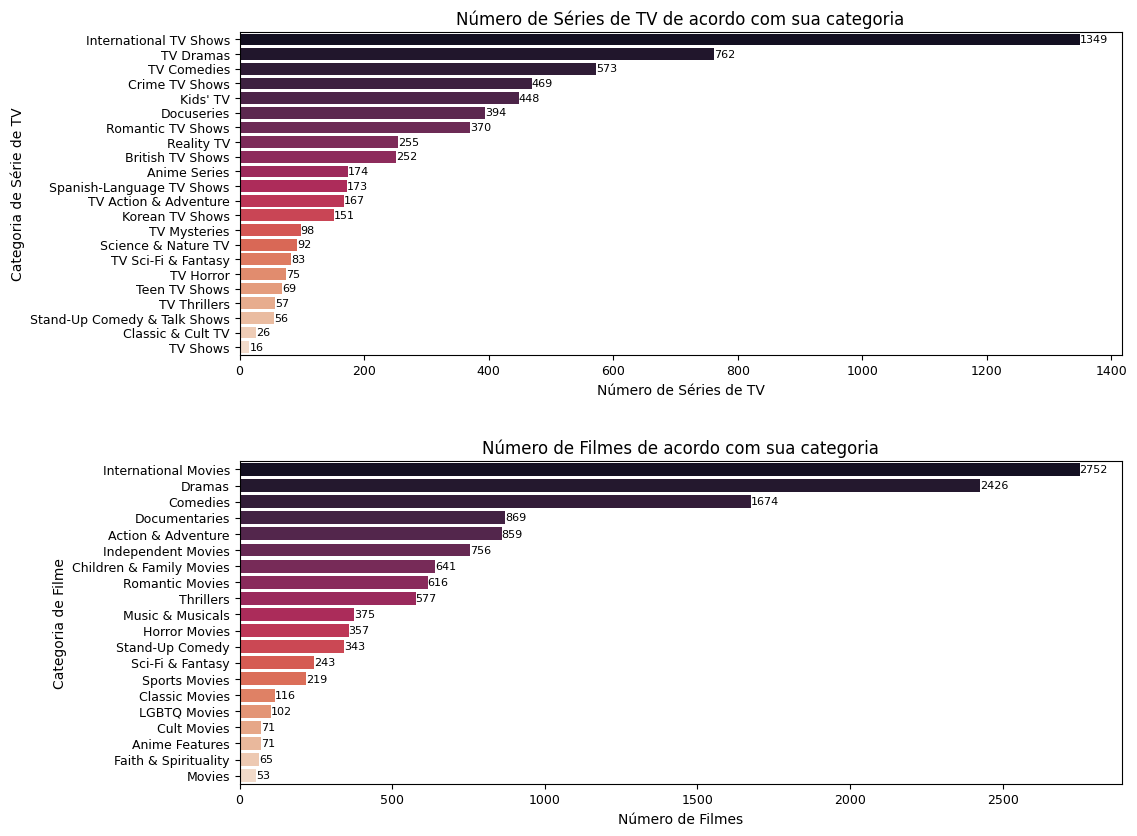

In [83]:
plt.figure(figsize=(12,9))

# Gráfico 1
plt.subplot(2, 1, 1)
ax = sns.barplot(tvshows_grouped, x=tvshows_grouped['count'], y=tvshows_grouped['listed_in'], 
            palette = 'rocket', orient = 'h', label = unique_tvshows)
plt.title('Número de Séries de TV de acordo com sua categoria', fontsize = 12)
plt.xlabel('Número de Séries de TV', fontsize = 10)
plt.ylabel('Categoria de Série de TV', fontsize = 10)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.bar_label(ax.containers[0], size = 8)

# Gráfico 2
plt.subplot(2, 1, 2)
ax = sns.barplot(movies_grouped, x=movies_grouped['count'], y=movies_grouped['listed_in'], 
            palette = 'rocket', orient = 'h', label = unique_movies)
plt.title('Número de Filmes de acordo com sua categoria', fontsize = 12)
plt.xlabel('Número de Filmes', fontsize = 10)
plt.ylabel('Categoria de Filme', fontsize = 10)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.bar_label(ax.containers[0], size = 8)

plt.tight_layout(pad = 3)

plt.show()

In [84]:
# Identificação de quantos títulos estão listados como somente 'International Movies'
IM = data.loc[data['listed_in'] == 'International Movies'].shape[0]
ITV = data.loc[data['listed_in'] == 'International TV Shows'].shape[0]

print('Somente International Movies:', IM)
print('Somente International TV Shows:', ITV)

Somente International Movies: 3
Somente International TV Shows: 2


#### -> Interpretações
- Para ambos os tipos de títulos, **Movie** e **TV Show**, constata-se que as 3 categorias com mais títulos são **Internacional**, **Drama** e **Comédia** respectivamente. Entretanto, as categorias **International Movies** e **International TV Shows** estão na grande maioria das vezes associadas a outras categorias, sendo que ambas aparacem sozinhas no dataset apenas 3 e 2 vezes, respectivamente. Por se tratar de categorias mais abrangentes, esse fato já era esperado. Dessa forma, pode-se dizer que **Drama** e **Comédia** são categorias mais relevantes se comparada a **Internacional**.
- Pode-se observar, portanto, uma possível preferência da Netlfix (provavelmente orientada pelo interesse do público) pelas categorias **Drama** e **Comédia**
- Séries de TV de **Ação e Aventura** são proporcionalmente menos presentes no catálogo do que Filmes de **Ação e Aventura**. A mesma lógica se aplica às categorias de **Horror**, **Stand-Up** e **Thrillers**. Adicionalmente, programas para crianças (não é especificado a faixa de idade) ocupam o top 5 no ranking de Séries de TV.

### 4.5 - Proporções entre títulos listados de acordo com sua duração ('duration')

#### Movie

In [85]:
# Amostra dos dados
dm.head()

,type,country,date_added,release_year,rating,duration,listed_in,release_decade
0,Movie,United States,2021-09-25,2020,PG-13,90,Documentaries,2020
6,Movie,not_given,2021-09-24,2021,TV-PG,91,Children & Family Movies,2020
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",1990
9,Movie,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",2020
12,Movie,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",2020


In [86]:
# Estatísticas descritivas a respeito do tempo de duração dos filmes de acordo com 'rating'
print(dm.duration.describe())

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


In [87]:
print("Número de valores únicos para duração dos filmes:", dm.duration.unique().size)

Número de valores únicos para duração dos filmes: 205


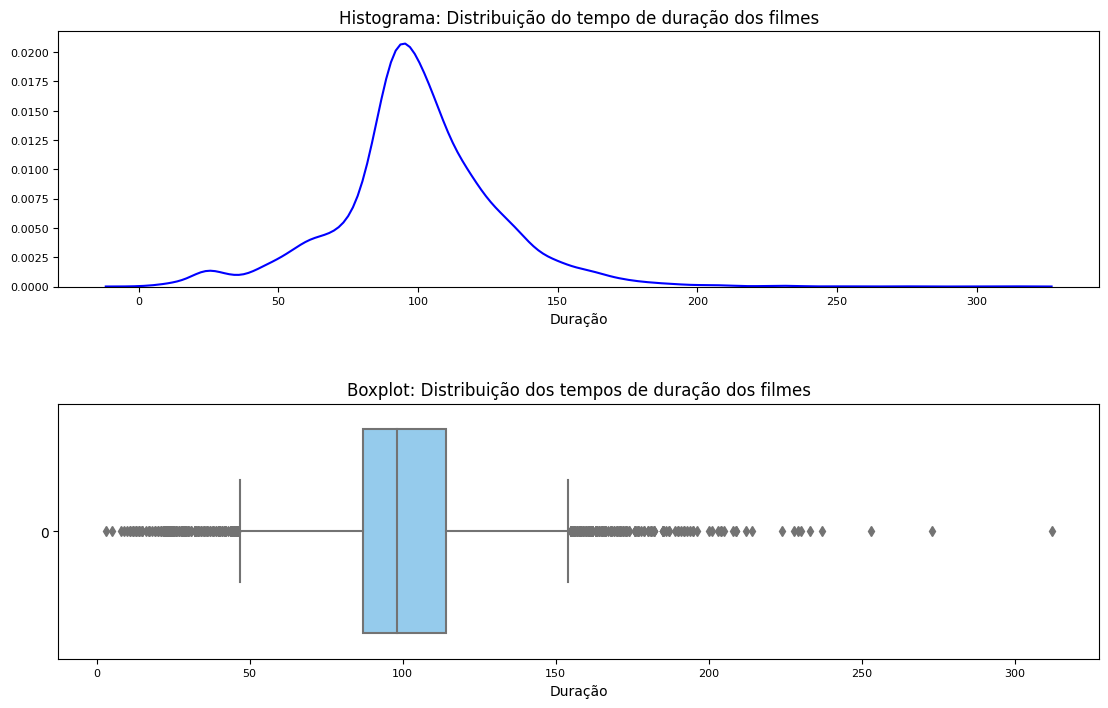

In [88]:
# Histograma e Boxplot para a variável 'duration'

plt.figure(figsize=(12,8))

# Histograma
plt.subplot(2,1,1)
sns.kdeplot(data = dm, x = dm['duration'], color='blue')
plt.title('Histograma: Distribuição do tempo de duração dos filmes', fontsize = 12)
plt.xlabel('Duração', fontsize = 10)
plt.ylabel('')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

# Boxplot
plt.subplot(2,1,2)
sns.boxplot(dm['duration'], orient = 'h', color = 'lightskyblue')
plt.title('Boxplot: Distribuição dos tempos de duração dos filmes', fontsize = 12)
plt.xlabel('Duração', fontsize = 10)
plt.xticks(fontsize = 8)

plt.tight_layout(pad=4)
plt.show()

In [89]:
# Teste de Normalidade
# Se valor_p > 0.05, a distribuição é normal
stats, valor_p = normaltest(dm['duration'])
if valor_p > 0.05:
    print('Distribuição Normal, com valor-p igual a', valor_p)
else:
    print('Distribuição Não Normal, com valor-p igual a', valor_p)

Distribuição Não Normal, com valor-p igual a 5.0665159623214593e-82


- Analisando o histograma e boxplot da variável **duration**, observa-se uma alta concentração dos dados ao redor da mediana, mas com certa assimetria da distribuição indicada pelo histograma. Existem ainda muitos valores outliers nessa variável, tanto acima quanto abaixo da mediana. Isso mostra que apesar de certa concentração dos dados ao redor da mediana, há muitos valores dispersos, indicando uma variabilidade muito alta nos dados. De fato, observando as estatísticas descritivas da variável, nota-se que a diferença entre os valores mínimo e máximo é de mais de 3 vezes o valor da média. Ou seja, há valores muito pequenos e valores muito grandes.
- Por fim, pode-se concluir a partir do teste de normalidade que, para filmes, a variável **duration** não segue uma distribuição normal. portanto, quaisquer aplicações que usem essa variável devem levar essa questão em consideração.

#### TV Show

In [90]:
# Amostra dos dados
dtv.head()

,type,country,date_added,release_year,rating,duration,listed_in,seasons,release_decade
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2,2020
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,2020
3,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",1,2020
4,TV Show,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2,2020
5,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,2020


In [91]:
#Tipos dos dados
dtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 1 to 8803
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            2664 non-null   string        
 1   country         2664 non-null   string        
 2   date_added      2664 non-null   datetime64[ns]
 3   release_year    2664 non-null   int64         
 4   rating          2664 non-null   string        
 5   duration        2664 non-null   object        
 6   listed_in       2664 non-null   string        
 7   seasons         2664 non-null   int32         
 8   release_decade  2664 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1), string(4)
memory usage: 197.7+ KB


In [92]:
dtv.seasons.describe()

count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: seasons, dtype: float64

In [93]:
# Dados para plotagem
freq_tv = dtv.groupby('seasons').size().reset_index(name='count')
freq_tv = freq_tv.assign(pct=(freq_tv['count']/freq_tv['count'].sum())*100)
freq_tv

,seasons,count,pct
0,1,1791,67.229730
1,2,421,15.803303
2,3,198,7.432432
3,4,94,3.528529
4,5,64,2.402402
5,6,33,1.238739
6,7,23,0.863363
7,8,17,0.638138
8,9,9,0.337838
9,10,6,0.225225


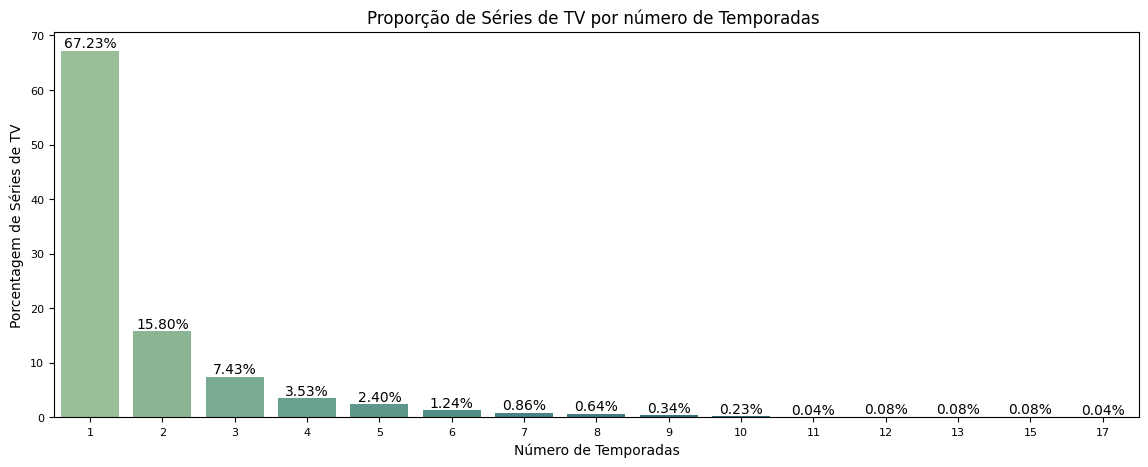

In [94]:
# Plotagem
plt.figure(figsize=(14,5))
ax = sns.barplot(freq_tv, x = freq_tv['seasons'], y=freq_tv['pct'],  palette = 'crest')
plt.bar_label(ax.containers[0], fmt = '%.2f%%', size = 10)
plt.title('Proporção de Séries de TV por número de Temporadas ', fontsize = 12)
plt.xlabel('Número de Temporadas', fontsize = 10)
plt.ylabel('Porcentagem de Séries de TV')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.show()


#### -> Interpretações
- A partir da análise acima nota-se que mais de dois terços das séries de TV listadas na Netflix possuiam apenas 1 temporada na data de disponibilização do dataset utilizado nesse estudo. 
- Mais de 90% das séries de TV possuem até três temporadas. Isso pode ser devido à descontinuidade de algumas séries, ou até mesmo pelo fato de muitos dos títulos serem novos no mercado. Estudos mais profundos são necessários para indicar a real causa dessa situação.
- Menos de 1% das séries de TV possuem 9 ou mais temporadas, o que pode indicar que séries muito extensas não agradam muito o público, que pode preferir séries curtas que podem ser assistidas em poucos dias, como em um único final de semana (prática comumente conhecida como 'maratonar uma série').

### 4.6 - Correlação entre o Ano de Lançamento de um Filme ('release_year') e sua duração ('duration')

#### Filmes das categorias 'Music & Musicals' e 'Classic Movies'

In [95]:
# Amostra de dados
movies_listed.head()

,type,country,date_added,release_year,rating,duration,listed_in,release_decade
0,Movie,United States,2021-09-25,2020,PG-13,90,Documentaries,2020
6,Movie,not_given,2021-09-24,2021,TV-PG,91,Children & Family Movies,2020
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas,1990
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Independent Movies,1990
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,International Movies,1990


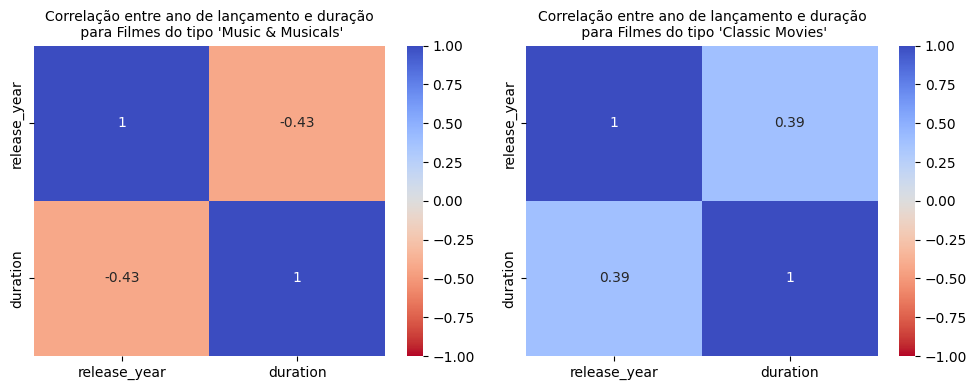

In [96]:
#Dados Gráfico 1
m_music = movies_listed.loc[movies_listed['listed_in'] == 'Music & Musicals']
cor_music = m_music[['release_year', 'duration']].corr()

#Dados Gráfico 2
m_classic = movies_listed.loc[movies_listed['listed_in'] == 'Classic Movies']
cor_classic = m_classic[['release_year', 'duration']].corr()

plt.figure(figsize=(10,4))

# Gráfico 1
plt.subplot(1,2,1)
sns.heatmap(cor_music, vmin = -1, vmax = 1, annot=True, cmap = 'coolwarm_r')
plt.title("Correlação entre ano de lançamento e duração\n para Filmes do tipo 'Music & Musicals'", fontsize = 10)

# Gráfico 2
plt.subplot(1,2,2)
sns.heatmap(cor_classic, vmin = -1, vmax = 1, annot=True, cmap = 'coolwarm_r')
plt.title("Correlação entre ano de lançamento e duração\n para Filmes do tipo 'Classic Movies'", fontsize = 10)

plt.tight_layout()
plt.show()

- A partir das análises acima, é possível notar que há uma correlação entre tempo de duração de alguns tipos de filmes e seu ano de lançamento de acordo com seu tipo. Filmes do tipo 'Music & Musicals' possuem uma correlação moderada negativa entre ano de lançamento e duração, o que significa que filmes mais novos tendem a ser mais curtos que os antigos.
- Em 'Classic Movies', a correlação é uma pouco mais fraca e positiva, indicando que ao longo dos anos o tempo de duração desse tipo de filme em geral aumentou.

#### Filmes de produção Indiana

In [97]:
# Amostra de Dados
movies_per_country_year.head()

,type,country,date_added,release_year,rating,duration,listed_in,release_decade
0,Movie,United States,2021-09-25,2020,PG-13,90,Documentaries,2020
6,Movie,not_given,2021-09-24,2021,TV-PG,91,Children & Family Movies,2020
7,Movie,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",1990
7,Movie,Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",1990
7,Movie,Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",1990


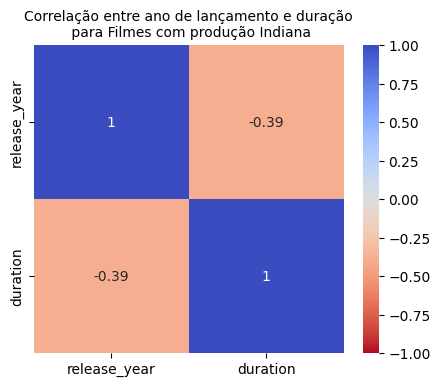

In [98]:
# Dados do Gráfico
mc = movies_per_country_year.loc[movies_per_country_year['country'] == 'India']
cor_country=mc[['release_year', 'duration']].corr()

# Plotagem
plt.figure(figsize=(5,4))
sns.heatmap(cor_country, vmin = -1, vmax = 1, annot=True, cmap = "coolwarm_r")
plt.title("Correlação entre ano de lançamento e duração\n para Filmes com produção Indiana", fontsize = 10)
plt.show()

- A correlação negativa entre tempo de duração e ano de lançamento de filmes de produção indiana, apesar de moderada, indica uma redução no tempo de duração de filmes indianos lançados com o passar dos anos.

### 4.7 - Correlação entre o Ano de Lançamento de uma Série de TV ('release_year) e sua duração ('duration')

#### Séries de TV do tipo 'Teen TV Shows'

In [99]:
# Amostra dos dados
tvshows_listed.head()

,type,country,date_added,release_year,rating,duration,listed_in,seasons,release_decade
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2,2020
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2,2020
1,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,2,2020
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,1,2020
2,TV Show,not_given,2021-09-24,2021,TV-MA,1 Season,International TV Shows,1,2020


In [100]:
tvl = tvshows_listed.loc[tvshows_listed['listed_in'] == 'Teen TV Shows']
cor_tv = tvl[['release_year', 'seasons']].corr()
cor_tv

,release_year,seasons
release_year,1.000000,-0.610012
seasons,-0.610012,1.000000


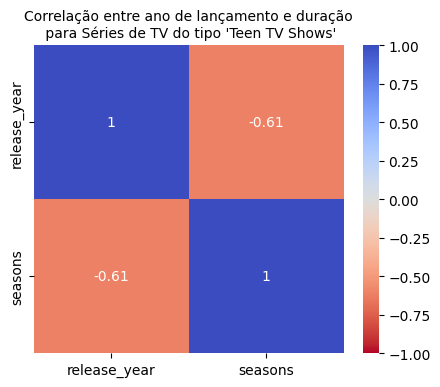

In [101]:
# Dados do Gráfico
tvlisted = tvshows_listed.loc[tvshows_listed['listed_in'] == 'Teen TV Shows']
cor_tv=tvlisted[['release_year', 'seasons']].corr()

# Plotagem
plt.figure(figsize=(5,4))
sns.heatmap(cor_tv, vmin = -1, vmax = 1, annot=True, cmap = "coolwarm_r")
plt.title("Correlação entre ano de lançamento e duração\n para Séries de TV do tipo 'Teen TV Shows'", fontsize = 10)
plt.show()

- Existe uma correlação moderada negativa entre o tempo de duração e o ano de lançamento de séries de TV do tipo 'Teen TV Shows', sugerindo que o tempo de duração desse tipo de título, em geral, reduziu com o passar dos anos de lançamento.

## 5 - Conclusões

O dataset utilizado nessa análise foi submetido primeiramente ao processo de **Tratamento de Dados**, onde foram feitas as seguintes modificações:
- **Drop de Colunas**: As variávies (colunas) *show_id*, *title*, *director*, *cast* e *description* foram descartadas pois as informações que carregam não são de interesse dessa análise;
- **Tratamento de Valores Ausentes**: Todas as demais variáveis passaram pelo processo de pesquisa por valores ausentes e tratamento dos mesmos quando encontrados. De forma resumida, foram tratados:
    - 831 valores ausentes da variável *country*. Esses valores foram substituídos (imputados) por 'not_given'.
    - 17 valores ausentes sendo 10 na variável *date_added*, 4 na variável *rating* e 3 na variável *duration*. Os registros que apresentaram esses valores foram deletados, pois a soma de todos representou 0.19% do total de registros no dataset. Sendo assim, a deleção é a estratégia mais indicada.
- **Agrupamento de categorias de mesmo significado**: Na variável *rating* foram identificadas, após pesquisa extensiva às informações públicas online da Netflix, ambiguidades em algumas categorias. Alguns pares de categorias apresentavam o mesmo significado, são eles:
    - G e TV-PG;
    - PG e TV-PG;
    - NR e UR.
- Sendo assim, esses dados foram agrupados através da imputação de valores, de forma que os dados da categoria 'G' recebe 'TV-PG', 'PG' recebe 'TV-PG' e 'UR' recebe 'NR'.
- **Conversão de tipos de dados**: O interpretador python atribui aos dados de entrada o tipo que lhe faz mais sentido de acordo com sua capacidade de interpretação. Muitas vezes é necessário fazer modificações, como é o caso em questão. Foram feitas as seguintes conversões de tipos de variáveis:
    - *date_added* convertida para datetime;
    - *type*, *listed_in*, *country* e *rating* convertidas para string;
    - *duration* convertida para int. No caso dessa variável, foram criados dois subsets para realizar a conversão: um deles contendo somente títulos do tipo (variável 'type') igual a 'Movie', e outro com o tipo igual a 'TV Shows'. No primeiro subset a conversão foi feita sobre a própria variável, já no segundo subset foi criada uma nova coluna para armazenar os dados convertidos. Não houve diferença na aplicação de um método ou outro no desenvolvimento da análise, trata-se de uma escolha do analista.

Após o tratamento dos dados, foi dado início ao processo de analisá-los. Nessa etapa, utilizou-se de ferramentas visuais para auxiliar na interpretação das informações contidas nos dados. Essas informações são:
- Informações quanto ao tipo de título: **Movie** e **TV Show**
    - Cerca de 70% dos títulos listados no catálogo da Netflix são Filmes;
    - De 2008 a 2014 a adição de Filmes e Séries de TV seguiram aproximadamente a mesma proporção, mas a partir de 2015 a listagem de novos Filmes superou, de forma proporcional, a adição de novas Séries de TV. A partir disso é possível sugerir que há uma preferência da Netflix em oferecer mais Filmes que Séries de TV. As reais causas para esse fenômeno só podem ser  inferidas a partir de estudos mais profundos, utilizando dados que possam fornecer tal resposta;
    - A partir de 2019 houve queda no número de listagem de novos títulos. A causa desse fenômeno não pode ser identificada com o uso do dataset e questão;
    - Para o ano de 2021, há no catálogo da Netflix mais Séries de TV lançadas que Filmes, entretanto não é possível dizer que esse foi o real desfecho do ano de 2021 pois o dataset em questão possui dados somente até setembro daquele ano. Para obter mais informações a respeito dessa questão, seriam necessários dados do ano completo;
- Informações sobre a classificação etária: **rating**
    - Menos de 3% dos títulos são de classificação indicativa livre, com outros 3.48% voltados para o público infantil;
    - Há uma clara preferência da plataforma em oferecer títulos voltados para o público adulto.
- Informações quanto o ano de lançamento dos títulos: **release_year**
    - Analisando os números de lançamentos por décadas, os Estados Unidos lideram em todos os períodos o lançamento de Filmes, liderando também o lançamento de Séries de TV só perdendo para o Reino Unido na década de 1970;
    - A indústria de Filmes indianos apresenta grande presença no catálogo da Netflix, sendo a segunda nação mais presente nos catálogos considerando o período de lançamento de 1960 até os anos 2020;
    - Adicionalmente, Índia e Estados Unidos possuem os maiores números de Filmes listados na Neflix;
    - o Japão conta com um número expressivo de Séries de TV lançadas entre 1990 e 2010 listadas na Netflix;
    - Taiwan possue um número considerável de Séries de TV lançadas entre 2000 e 2010 listadas na Netlfix, sendo que Índia e Coréia do Sul seguem a mesma lógica para lançamentos nos anos 2010;
    - Séries de TV de língua inglesa se mostram mais presentes no catálogo da Netflix se comparadas a qualquer outro idioma. Isso pode ser explicado pela globalização desse idioma.
- Informações a respeito da categoria dos títulos: **listed_ind**
    - Títulos das categorias *Drama* e *Comédia* são os mais presentes no catálogo da Netlfix, tanto para Filmes quanto para Séries de TV;
    - Séries de TV de **Ação e Aventura** são proporcionalmente menos presentes no catálogo do que Filmes de **Ação e Aventura**. A mesma lógica se aplica às categorias de **Horror**, **Stand-Up** e **Thrillers**;
    - Adicionalmente, programas para crianças (não é especificado a faixa de idade) ocupam o top 5 no ranking de Séries de TV.
- Informações a respeito do tempo de duração: **duration**
    - A grande maioria dos Filmes tem duração entre 70min e 120min, mas existem títulos com menos de 10min e outros mais de 300min. Isso mostra uma grande dispersão nos dados. Adicionalmente, foi observado que a variável **duration** (para Filmes) não segue uma distribuição normal e apresenta uma grande quantidade de outliers;
    - No caso de Séries de TV, mais de dois terços dos títulos possuem apenas 1 temporada no período de estudo. Mais de 90% possuem até 3 temporadas, e menos de 1% possuem 9 ou mais temporadas. Isso pode indicar uma preferência do público por séries curtas, que podem ser assistidas em poucos dias, como em um único final de semana (prática comumente conhecida como "maratonar uma série").
- Correlações:
    - Foi identificada uma correlação entre tempo de duração de alguns tipos de filmes e seu ano de lançamento, de acordo com seu tipo. Filmes do tipo *Music & Musicals* possuem uma correlação moderada negativa entre ano de lançamento e duração, o que significa que filmes mais novos tendem a ser mais curtos que os antigos. Para *Classic Movies*, a correlação é uma pouco mais fraca e positiva, indicando que ao longo dos anos o tempo de duração desse tipo de filme em geral aumentou;
    - Foi calculada uma correlação negativa entre tempo de duração e ano de lançamento de filmes de produção indiana, que apesar de moderada indica uma redução no tempo de duração de filmes indianos lançados com o passar dos anos;
    - Existe uma correlação moderada negativa entre o tempo de duração e o ano de lançamento de Séries de TV do tipo 'Teen TV Shows', sugerindo que o tempo de duração desse tipo de título, em geral, reduziu com o passar dos anos de lançamento.